In [1]:
import pandas as pd
import ast

# Load the datasets
movies_file = "tmdb_5000_movies.csv"
credits_file = "tmdb_5000_credits.csv"

movies_df = pd.read_csv(movies_file)
credits_df = pd.read_csv(credits_file)

# Display descriptive statistics for both datasets
print("Descriptive statistics for tmdb_5000_movies.csv:")
print(movies_df.describe())
print("\nMissing values in tmdb_5000_movies.csv:")
print(movies_df.isnull().sum())

print("\nDescriptive statistics for tmdb_5000_credits.csv:")
print(credits_df.describe())
print("\nMissing values in tmdb_5000_credits.csv:")
print(credits_df.isnull().sum())


Descriptive statistics for tmdb_5000_movies.csv:
             budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.00000

📊 Column: budget
  Shapiro-Wilk: Stat = 0.717, p = 0.000
  Conclusion: Not Normal

📊 Column: popularity
  Shapiro-Wilk: Stat = 0.527, p = 0.000
  Conclusion: Not Normal

📊 Column: revenue
  Shapiro-Wilk: Stat = 0.538, p = 0.000
  Conclusion: Not Normal

📊 Column: runtime
  Shapiro-Wilk: Stat = 0.874, p = 0.000
  Conclusion: Not Normal

📊 Column: vote_average
  Shapiro-Wilk: Stat = 0.862, p = 0.000
  Conclusion: Not Normal

📊 Column: vote_count
  Shapiro-Wilk: Stat = 0.566, p = 0.000
  Conclusion: Not Normal



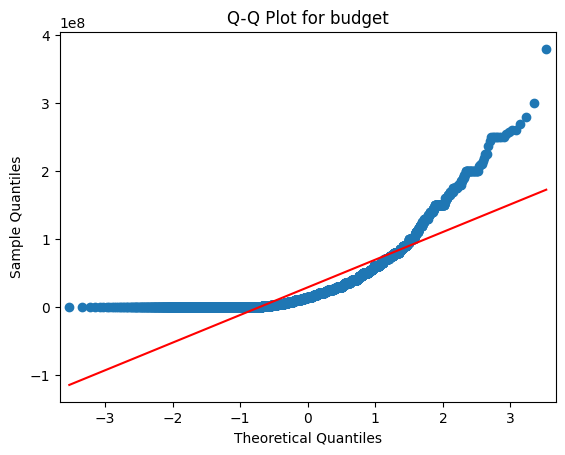

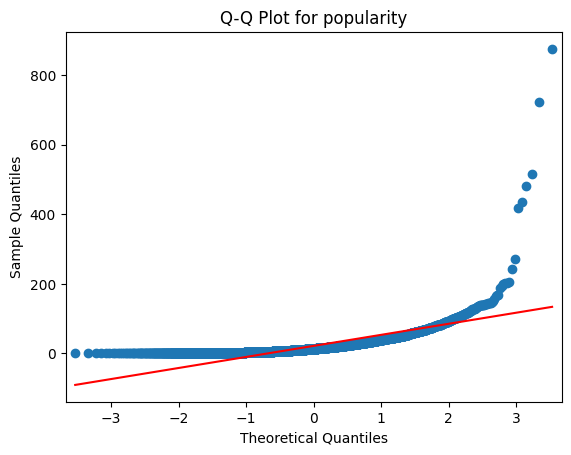

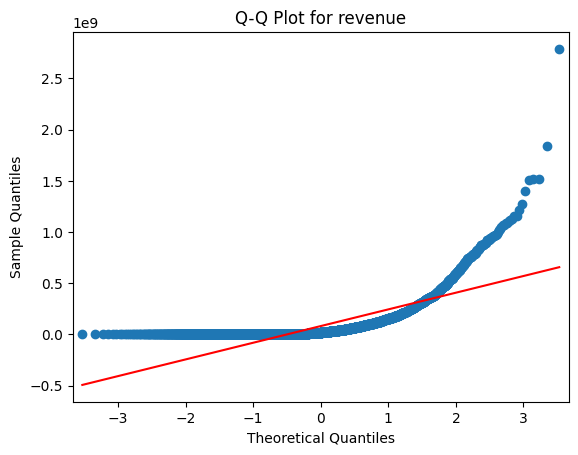

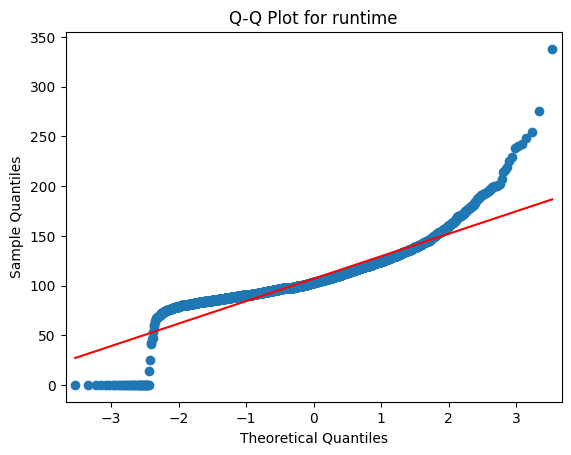

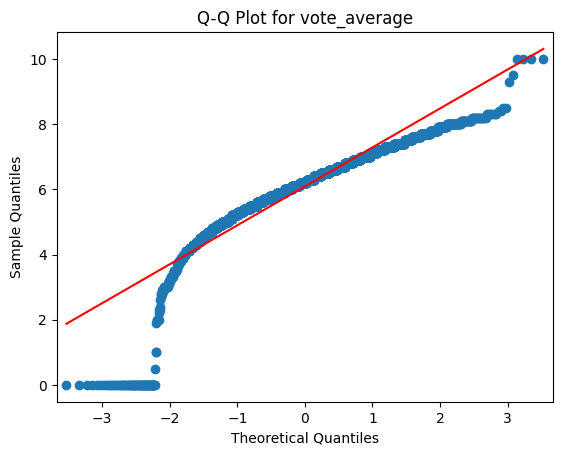

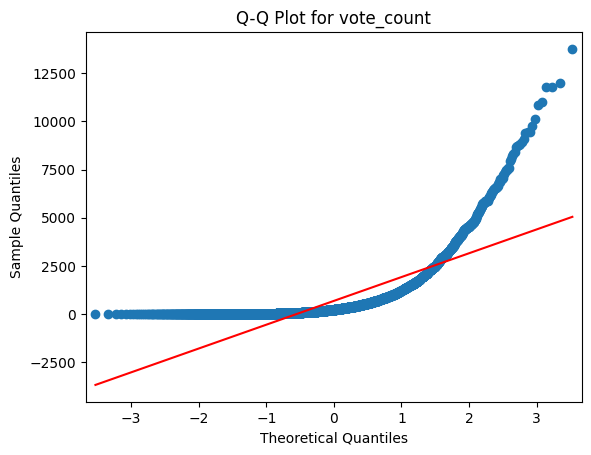

In [3]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import statsmodels.api as sm
for col in credits_df.select_dtypes(include=['number']).columns:
    if col=='movie_id':
        continue
    data = credits_df[col].dropna()
    if len(data) < 3:
        print(f"⚠️ Column '{col}': Insufficient data (n < 3).")
        continue
    stat, p = shapiro(data)
    alpha = 0.05
    print(f"📊 Column: {col}")
    print(f"  Shapiro-Wilk: Stat = {stat:.3f}, p = {p:.3f}")
    print(f"  Conclusion: {'Normal' if p > alpha else 'Not Normal'}\n")

for col in movies_df.select_dtypes(include=['number']).columns:
    if col=='id':
        continue
    data = movies_df[col].dropna()
    if len(data) < 3:
        print(f"⚠️ Column '{col}': Insufficient data (n < 3).")
        continue
    stat, p = shapiro(data)
    alpha = 0.05
    print(f"📊 Column: {col}")
    print(f"  Shapiro-Wilk: Stat = {stat:.3f}, p = {p:.3f}")
    print(f"  Conclusion: {'Normal' if p > alpha else 'Not Normal'}\n")
for col in movies_df.select_dtypes(include=['number']).columns:
    if col=='id':
        continue
    data = movies_df[col].dropna()
    sm.qqplot(data, line='s')
    plt.title(f"Q-Q Plot for {col}")
    plt.show()

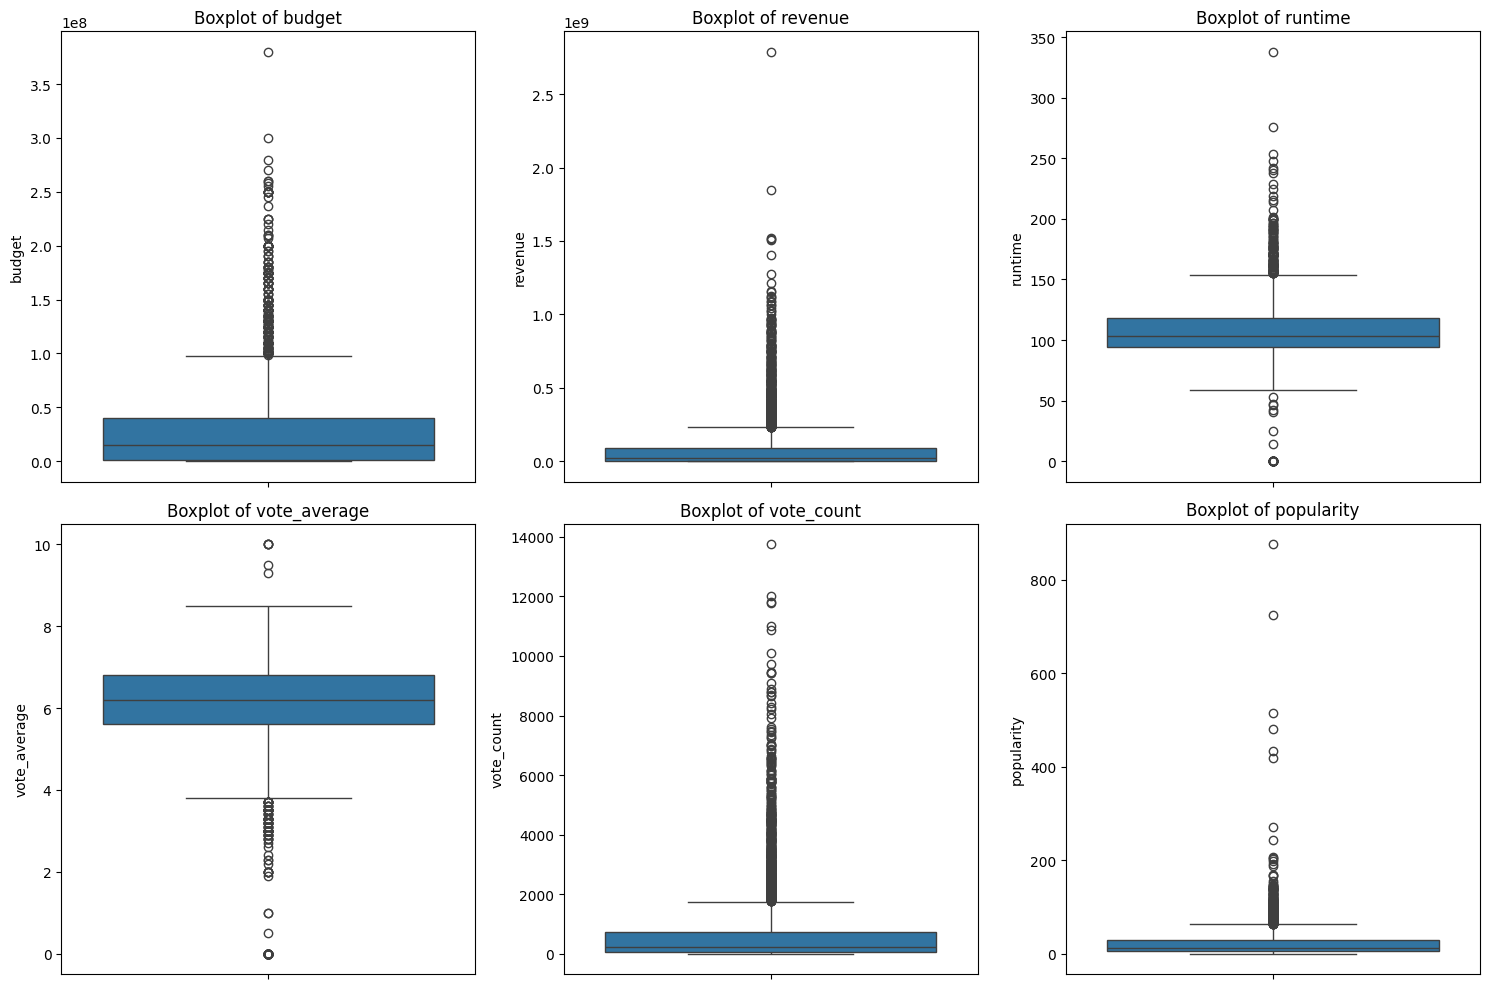

Original dataset size: 4803 rows
Cleaned dataset size: 3429 rows


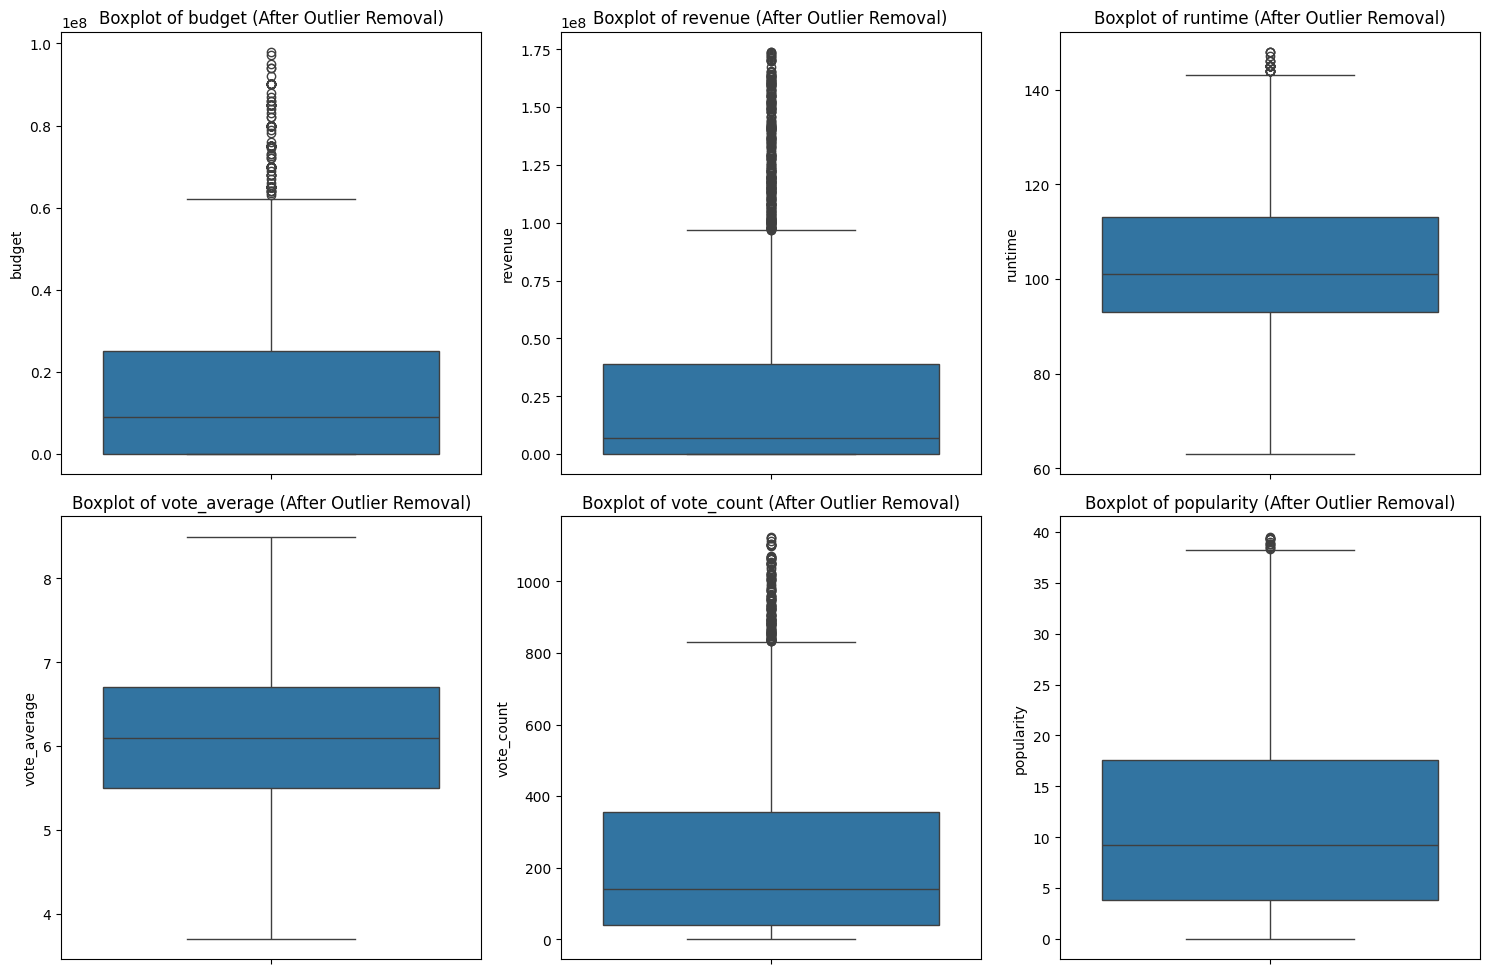

(3429, 20)
budget                     0
genres                     0
homepage                2402
id                         0
keywords                   0
original_language          0
original_title             0
overview                   1
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  690
title                      0
vote_average               0
vote_count                 0
dtype: int64
movie_id    0
title       0
cast        0
crew        0
dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ["budget", "revenue", "runtime", "vote_average", "vote_count", "popularity"]

# Draw box plots before removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=movies_df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each numerical column
movies_cleaned = movies_df.copy()
for col in numerical_cols:
    movies_cleaned = remove_outliers_iqr(movies_cleaned, col)

# Print data size before and after outlier removal
print(f"Original dataset size: {movies_df.shape[0]} rows")
print(f"Cleaned dataset size: {movies_cleaned.shape[0]} rows")

# Draw box plots after removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=movies_cleaned[col])
    plt.title(f"Boxplot of {col} (After Outlier Removal)")
plt.tight_layout()
plt.show()

movies_df = remove_outliers_iqr(movies_df, 'budget')
movies_df = remove_outliers_iqr(movies_df, 'revenue')
movies_df = remove_outliers_iqr(movies_df, 'runtime')
movies_df = remove_outliers_iqr(movies_df, 'vote_average')
movies_df = remove_outliers_iqr(movies_df, 'vote_count')
movies_df = remove_outliers_iqr(movies_df, 'popularity')

print(movies_df.shape)

print(movies_cleaned.isnull().sum())
print(credits_df.isnull().sum())

In [ ]:
print(movies_cleaned[numerical_cols].describe())

             budget       revenue      runtime  vote_average   vote_count  \
count  3.429000e+03  3.429000e+03  3429.000000   3429.000000  3429.000000   
mean   1.675101e+07  2.673539e+07   103.559055      6.070020   236.782735   
std    2.066974e+07  3.947928e+07    14.588055      0.847134   251.153541   
min    0.000000e+00  0.000000e+00    63.000000      3.700000     1.000000   
25%    0.000000e+00  0.000000e+00    93.000000      5.500000    41.000000   
50%    9.000000e+06  6.814789e+06   101.000000      6.100000   140.000000   
75%    2.500000e+07  3.874840e+07   113.000000      6.700000   357.000000   
max    9.800000e+07  1.739594e+08   148.000000      8.500000  1125.000000   

        popularity  
count  3429.000000  
mean     11.639366  
std       9.436216  
min       0.000372  
25%       3.832858  
50%       9.270133  
75%      17.603823  
max      39.539045  


In [ ]:
movies_cleaned['profit'] = movies_cleaned['revenue'] - movies_cleaned['budget']
df = movies_cleaned.merge(credits_df, left_on='id', right_on='movie_id')

# Convert genres column from JSON-like string to a list of genres
def extract_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return [genre['name'] for genre in genres]
    except:
        return []

df['genres'] = df['genres'].apply(extract_genres)

# Extract year from release_date
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Expand genres into separate rows and retain the year column
genres_exploded = df.explode('genres')

# 1. Genres with the highest average revenue
genre_revenue = genres_exploded.groupby('genres')['revenue'].mean().sort_values(ascending=False)
print("Genres with the highest average revenue:")
print(genre_revenue.head(10))



Genres with the highest average revenue:
genres
Adventure          4.137636e+07
Family             3.907635e+07
Fantasy            3.638348e+07
Animation          3.528042e+07
Action             3.333864e+07
Mystery            3.156146e+07
Thriller           2.987647e+07
Crime              2.959178e+07
History            2.955614e+07
Science Fiction    2.908409e+07
Name: revenue, dtype: float64



Correlation between movie budgets and ratings:
               budget  vote_average
budget        1.00000      -0.12611
vote_average -0.12611       1.00000


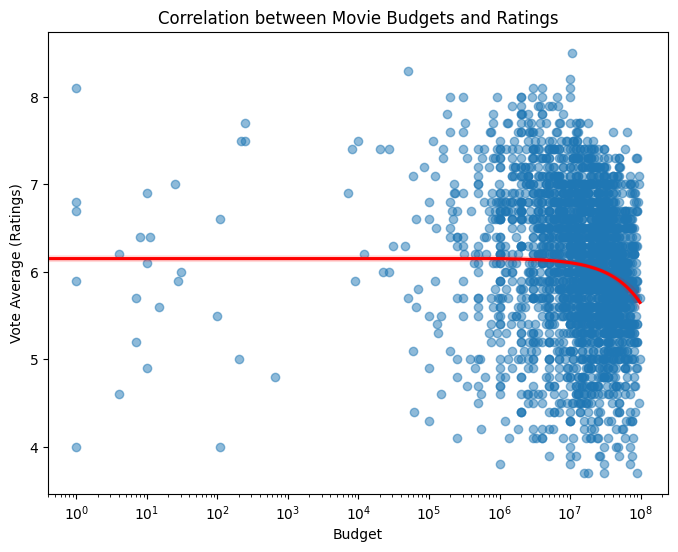

In [ ]:
# 2. Correlation between movie budgets and ratings
correlation = df[['budget', 'vote_average']].corr()
print("\nCorrelation between movie budgets and ratings:")
print(correlation)
plt.figure(figsize=(8,6))
sns.regplot(x=df['budget'], y=df['vote_average'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Budget")
plt.ylabel("Vote Average (Ratings)")
plt.title("Correlation between Movie Budgets and Ratings")
plt.xscale("log")  # Log scale for better visualization (if budgets have large variations)
plt.show()

In [ ]:
# 3. Directors with consistently high box office success
def extract_director(crew_str):
    try:
        crew_list = ast.literal_eval(crew_str)
        return next((person['name'] for person in crew_list if person['job'] == 'Director'), None)
    except:
        return None

df['director'] = df['crew'].apply(extract_director)
director_revenue = df.groupby('director')['revenue'].mean().sort_values(ascending=False)
print("\nTop directors with consistently high box office success:")
print(director_revenue.head(10))



Top directors with consistently high box office success:
director
Peter Billingsley     1.718448e+08
Seth Gordon           1.637337e+08
Raja Gosnell          1.616205e+08
Hideo Nakata          1.614515e+08
Irvin Kershner        1.600000e+08
Steven Quale          1.592449e+08
Wilson Yip            1.568448e+08
Sylvester Stallone    1.557211e+08
Adam McKay            1.549076e+08
John Glen             1.542975e+08
Name: revenue, dtype: float64



Production companies with the highest average revenue:
production_companies
Maven Entertainment                    172363301.0
Loofah Productions                     171963386.0
AR-TL                                  170268750.0
Zookeeper Productions                  169852759.0
Hey Eddie                              169852759.0
Extension 765                          167221571.0
World Wrestling Entertainment (WWE)    165333180.0
Ott Medien                             163733697.0
Motion Picture JOTA Produktions        162944923.0
Pangaea                                160638883.0
Name: revenue, dtype: float64


<ipython-input-14-48af5871899e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=production_revenue.head(10).values, y=production_revenue.head(10).index, palette="coolwarm")


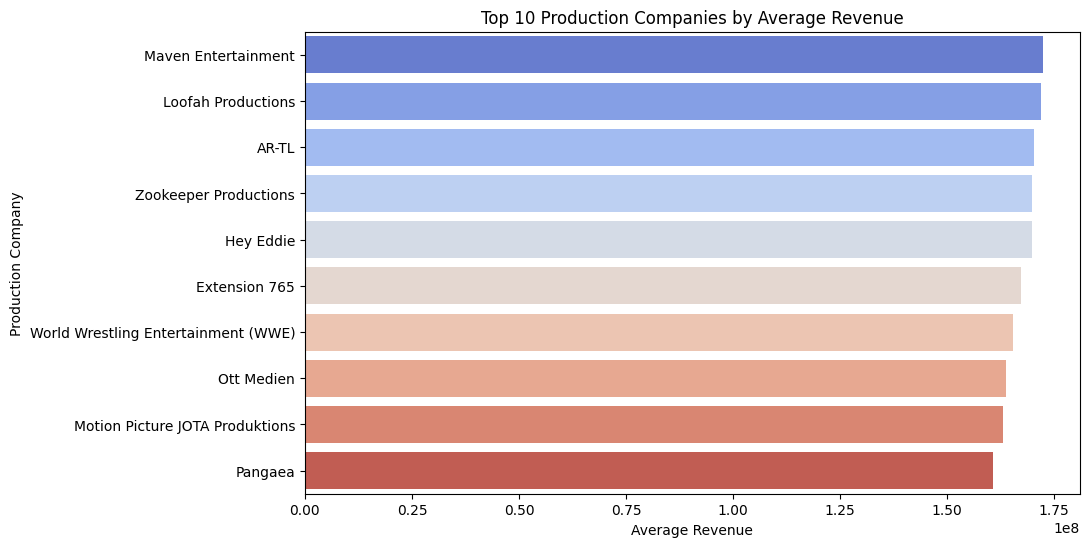

In [ ]:
# 5. Most common production companies with the highest average revenue
def extract_production_companies(companies_str):
    try:
        companies = ast.literal_eval(companies_str)
        return [company['name'] for company in companies]
    except:
        return []

df['production_companies'] = df['production_companies'].apply(extract_production_companies)
production_exploded = df.explode('production_companies')
production_revenue = production_exploded.groupby('production_companies')['revenue'].mean().sort_values(ascending=False)
print("\nProduction companies with the highest average revenue:")
print(production_revenue.head(10))
plt.figure(figsize=(10,6))
sns.barplot(x=production_revenue.head(10).values, y=production_revenue.head(10).index, palette="coolwarm")
plt.xlabel("Average Revenue")
plt.ylabel("Production Company")
plt.title("Top 10 Production Companies by Average Revenue")
plt.show()



Average runtime of movies by genre:
genres
History      121.134921
War          120.268293
Western      109.508772
Drama        108.300617
Foreign      106.967742
Music        106.125828
Romance      105.923291
Crime        105.438735
Mystery      104.975104
Adventure    104.880779
Name: runtime, dtype: float64


<ipython-input-15-1aed5a0f9b02>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_runtime.head(10).values, y=genre_runtime.head(10).index, palette="magma")


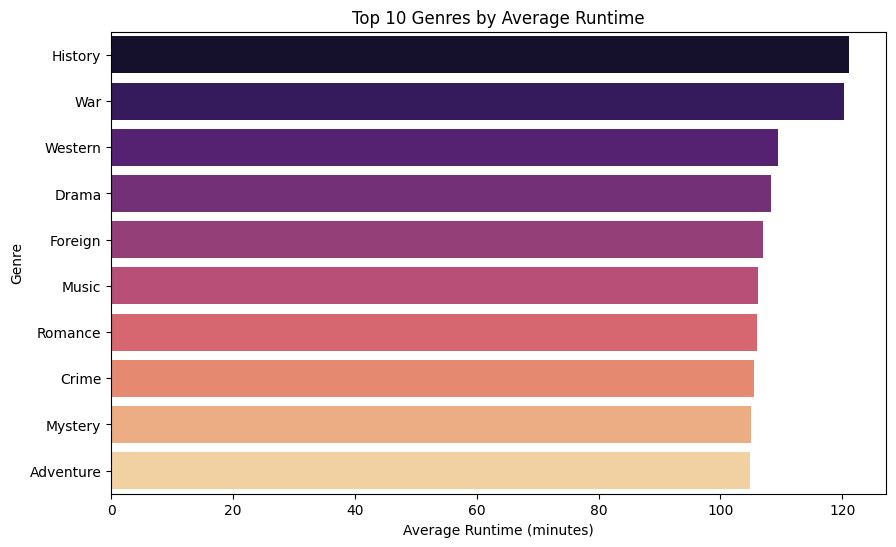

In [ ]:
# 6. Average runtime of movies by genre
genre_runtime = genres_exploded.groupby('genres')['runtime'].mean().sort_values(ascending=False)
print("\nAverage runtime of movies by genre:")
print(genre_runtime.head(10))
plt.figure(figsize=(10,6))
sns.barplot(x=genre_runtime.head(10).values, y=genre_runtime.head(10).index, palette="magma")
plt.xlabel("Average Runtime (minutes)")
plt.ylabel("Genre")
plt.title("Top 10 Genres by Average Runtime")
plt.show()

In [ ]:
# 7. Most successful actors based on average movie revenue
def extract_cast(cast_str):
    try:
        cast_list = ast.literal_eval(cast_str)
        return [person['name'] for person in cast_list]
    except:
        return []

df['cast'] = df['cast'].apply(extract_cast)
cast_exploded = df.explode('cast')
actor_revenue = cast_exploded.groupby('cast')['revenue'].mean().sort_values(ascending=False)
print("\nMost successful actors based on average movie revenue:")
print(actor_revenue.head(10))


Most successful actors based on average movie revenue:
cast
Jascha Washington       173959438.0
Bill Kurtis             173649015.0
Brian Patrick Butler    173649015.0
Sarah E. Spencer        173649015.0
Patrick Ferrell         173398518.0
Leon Redbone            173398518.0
Beatrice Zeilinger      172855065.0
Deadra Moore            172363301.0
Tom Hand                172363301.0
Lynn McRee              172363301.0
Name: revenue, dtype: float64



Correlation between movie budget and revenue:
           budget   revenue
budget   1.000000  0.565778
revenue  0.565778  1.000000


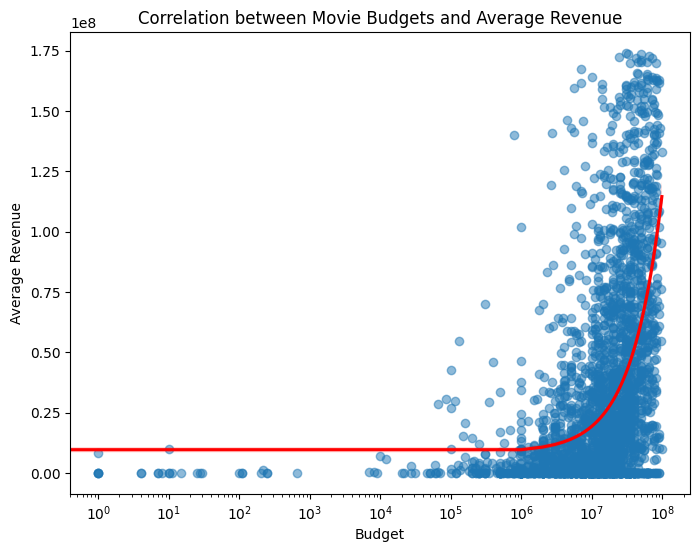

In [ ]:
# 8. Relationship between movie budget and revenue
budget_revenue_correlation = df[['budget', 'revenue']].corr()
print("\nCorrelation between movie budget and revenue:")
print(budget_revenue_correlation)
plt.figure(figsize=(8,6))
sns.regplot(x=df['budget'], y=df['revenue'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Budget")
plt.ylabel("Average Revenue")
plt.title("Correlation between Movie Budgets and Average Revenue")
plt.xscale("log")  # Log scale for better visualization (if budgets have large variations)
plt.show()

In [ ]:
genres_exploded = movies_cleaned.explode('genres')
genres_exploded = df.explode('genres')
#print(df.isnull().sum())
print(df[['genres']])
genre_profit = genres_exploded.groupby('genres')['profit'].mean().sort_values(ascending=False)

print("Genres with the highest average profit:")

plt.figure(figsize=(10,6))
plt.barh(genre_profit.head(10).values, genre_profit.head(10).index,color='green')
plt.ylabel("Average Profit")
plt.xlabel("Genre")
plt.title("Top 10 Most Profitable Genres")
plt.show()

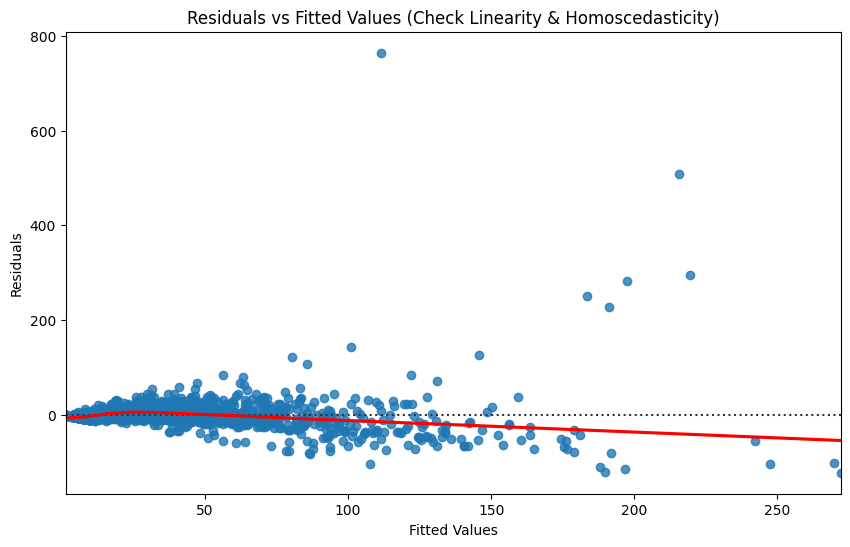


Breusch-Pagan Test p-value: 1.6208437023494563e-37
--> Non-significant p-value (>0.05) suggests homoscedasticity


<Figure size 1000x600 with 0 Axes>

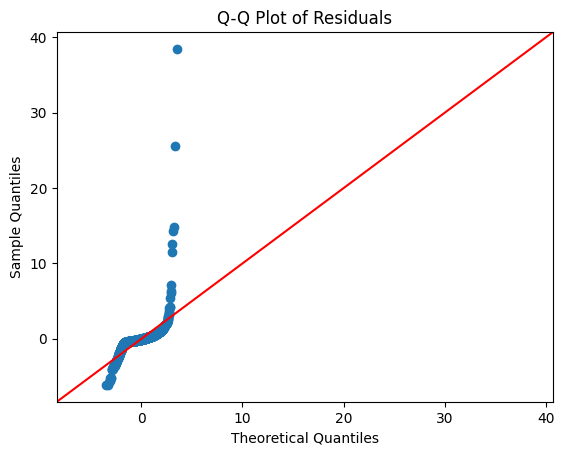


Variance Inflation Factors (VIF):
const: 28.48
vote_average: 1.12
vote_count: 2.75
revenue: 2.59
--> VIF > 10 indicates severe multicollinearity


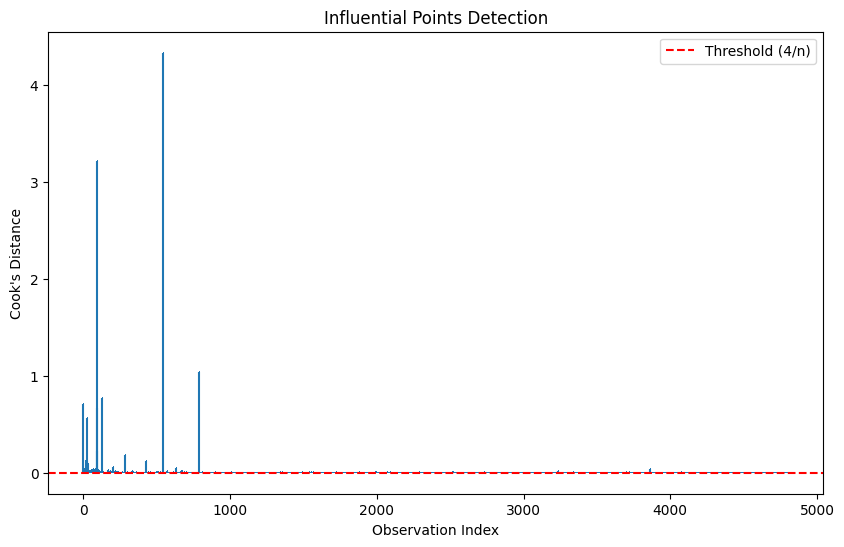


Number of influential points (Cook's D > 0.0008): 183


In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("tmdb_5000_movies.csv")

# Select features and target (example: predict revenue using budget and popularity)
X = df[['vote_average', 'vote_count','revenue']].dropna()
y = df['popularity'].loc[X.index]

# Add constant and fit OLS model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# --------------------------
# 1. Linearity Check
# --------------------------
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Check Linearity & Homoscedasticity)')
plt.show()

# --------------------------
# 2. Homoscedasticity Check
# --------------------------
# Breusch-Pagan test
_, p_val, _, _ = het_breuschpagan(model.resid, model.model.exog)
print(f"\nBreusch-Pagan Test p-value: {p_val}")
print("--> Non-significant p-value (>0.05) suggests homoscedasticity")

# --------------------------
# 3. Normality Check
# --------------------------
# Q-Q plot
plt.figure(figsize=(10, 6))
qqplot(model.resid, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()


# --------------------------
# 4. Multicollinearity Check
# --------------------------
# Calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF):")
for col, vif_val in zip(X.columns, vif):
    print(f"{col}: {vif_val:.2f}")
print("--> VIF > 10 indicates severe multicollinearity")

# --------------------------
# 5. Influential Points Check
# --------------------------
# Cook's distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
threshold = 4 / len(y)

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
plt.axhline(threshold, color='r', linestyle='--', label='Threshold (4/n)')
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Influential Points Detection")
plt.legend()
plt.show()

print(f"\nNumber of influential points (Cook's D > {threshold:.4f}): {sum(cooks_d > threshold)}")

Man whitney's U test and its applications

U-statistic: 47887.5000, p-value: 0.5026
No significant difference in vote average between 1990s and 2000s Action movies (p ≥ 0.05).
Number of 1990s Action movies: 199
Number of 2000s Action movies: 466
Median vote average (1990s): 6.10
Median vote average (2000s): 6.00


<ipython-input-59-f35cfc86a5a1>:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([action_1990s, action_2000s], labels=['1990s', '2000s'], patch_artist=True,


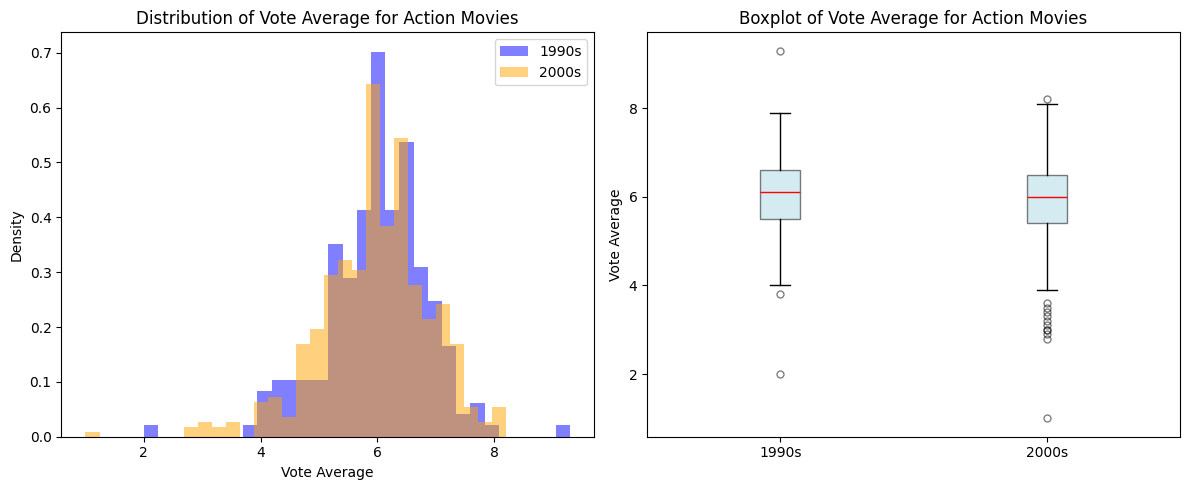

In [59]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

# Load the movies dataset (replace with your actual file path)
df = pd.read_csv('tmdb_5000_movies.csv')

# Filter out movies with missing or invalid data
df = df.dropna(subset=['release_date', 'vote_average', 'genres'])
df = df[df['vote_average'] > 0]  # Ensure positive vote average

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df = df.dropna(subset=['release_date'])  # Drop rows where release_date couldn't be parsed

# Define groups for Action movies in 1990s and 2000s
action_1990s = df[(df['genres'].str.contains('Action', na=False)) &
                  (df['release_date'].dt.year >= 1990) &
                  (df['release_date'].dt.year < 2000)]['vote_average']
action_2000s = df[(df['genres'].str.contains('Action', na=False)) &
                  (df['release_date'].dt.year >= 2000) &
                  (df['release_date'].dt.year < 2010)]['vote_average']

# Check if groups are non-empty
if len(action_1990s) == 0:
    print("Warning: No Action movies found in the 1990s. Please check the dataset.")
    exit()
if len(action_2000s) == 0:
    print("Warning: No Action movies found in the 2000s. Please check the dataset.")
    exit()

# Run the Mann-Whitney U test
stat, p = mannwhitneyu(action_1990s, action_2000s)
print(f"U-statistic: {stat:.4f}, p-value: {p:.4f}")

# Interpret the result
if p < 0.05:
    print("There is a significant difference in vote average between 1990s and 2000s Action movies (p < 0.05).")
else:
    print("No significant difference in vote average between 1990s and 2000s Action movies (p ≥ 0.05).")

# Calculate sample sizes and medians for context
print(f"Number of 1990s Action movies: {len(action_1990s)}")
print(f"Number of 2000s Action movies: {len(action_2000s)}")
print(f"Median vote average (1990s): {np.median(action_1990s):.2f}")
print(f"Median vote average (2000s): {np.median(action_2000s):.2f}")

# Plotting
# Create a figure with two subplots (histogram and boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
ax1.hist(action_1990s, bins=30, alpha=0.5, label='1990s', color='blue', density=True)
ax1.hist(action_2000s, bins=30, alpha=0.5, label='2000s', color='orange', density=True)
ax1.set_xlabel('Vote Average')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Vote Average for Action Movies')
ax1.legend()
# Optional: Use log scale for x-axis if needed (unlikely for vote_average)
# ax1.set_xscale('log')
# ax1.set_xlabel('Vote Average (Log Scale)')

# Boxplot
ax2.boxplot([action_1990s, action_2000s], labels=['1990s', '2000s'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.5),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markersize=5, alpha=0.5))
ax2.set_ylabel('Vote Average')
ax2.set_title('Boxplot of Vote Average for Action Movies')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('vote_average_action_decades_plot.png')

# Show the plot
plt.show()

This shows that 1990's action movies ratings  has not differ significantly as compared to 2000's action movies.

Do movies with higher crew diversity (e.g., more unique roles) have different popularity scores than those with less diversity?

Mann-Whitney U Test Statistic: 4491447.0000
P-value: 0.0000
Median Popularity (High Diversity): 22.98
Median Popularity (Low Diversity): 6.90
There is a significant difference in popularity scores between movies with high and low crew diversity.
Number of High Diversity movies: 2333
Number of Low Diversity movies: 2469


<ipython-input-60-72844d9bf679>:86: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([high_diversity, low_diversity], labels=['High Diversity', 'Low Diversity'], patch_artist=True,


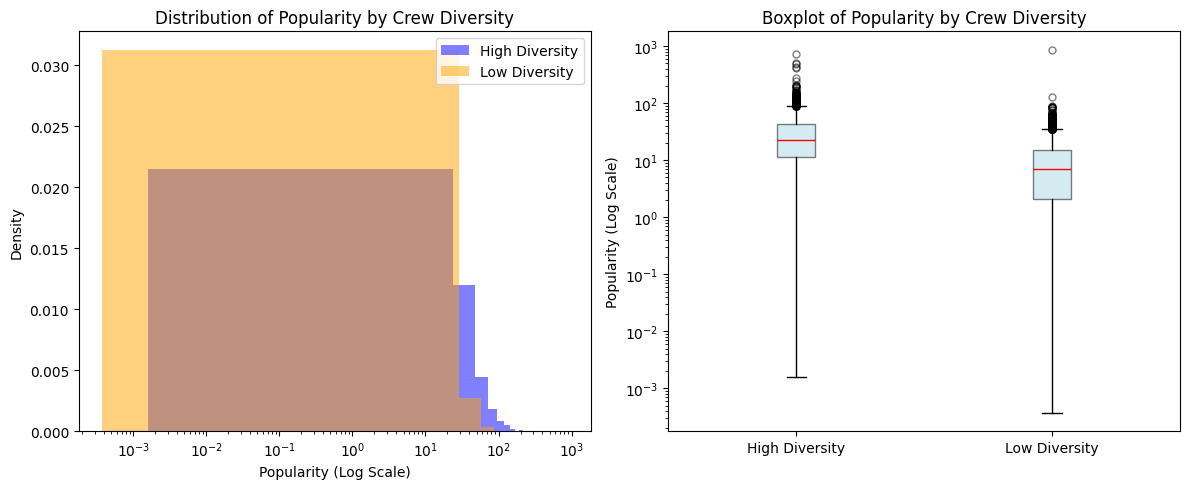

In [60]:
import pandas as pd
import numpy as np
import ast
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

# Load the datasets (replace with actual file paths)
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

# Filter out movies with missing or invalid popularity
movies = movies.dropna(subset=['popularity'])
movies = movies[movies['popularity'] > 0]  # Ensure positive popularity

# Parse the crew column
credits['crew'] = credits['crew'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

# Calculate the number of unique job roles per movie
credits['unique_roles'] = credits['crew'].apply(
    lambda crew: len(set([member['job'] for member in crew])) if crew else 0
)

# Merge with movies dataset to get popularity scores
merged_df = credits[['movie_id', 'unique_roles']].merge(
    movies[['id', 'popularity']],
    left_on='movie_id',
    right_on='id',
    how='inner'
)

# Remove rows with missing data
merged_df = merged_df.dropna(subset=['popularity', 'unique_roles'])

# Check if merged dataframe is empty
if merged_df.empty:
    print("Warning: No valid data after merging. Please check the datasets.")
    exit()

# Calculate the median number of unique roles
median_unique_roles = merged_df['unique_roles'].median()

# Split into high and low diversity groups
high_diversity = merged_df[merged_df['unique_roles'] > median_unique_roles]['popularity']
low_diversity = merged_df[merged_df['unique_roles'] <= median_unique_roles]['popularity']

# Check if groups are non-empty
if len(high_diversity) == 0:
    print("Warning: No movies with high crew diversity. Please check the data.")
    exit()
if len(low_diversity) == 0:
    print("Warning: No movies with low crew diversity. Please check the data.")
    exit()

# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(high_diversity, low_diversity)
print(f"Mann-Whitney U Test Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")
print(f"Median Popularity (High Diversity): {high_diversity.median():.2f}")
print(f"Median Popularity (Low Diversity): {low_diversity.median():.2f}")

# Interpret the result
if p < 0.05:
    print("There is a significant difference in popularity scores between movies with high and low crew diversity.")
else:
    print("There is no significant difference in popularity scores between movies with high and low crew diversity.")

# Calculate sample sizes for context
print(f"Number of High Diversity movies: {len(high_diversity)}")
print(f"Number of Low Diversity movies: {len(low_diversity)}")

# Plotting
# Create a figure with two subplots (histogram and boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
ax1.hist(high_diversity, bins=30, alpha=0.5, label='High Diversity', color='blue', density=True)
ax1.hist(low_diversity, bins=30, alpha=0.5, label='Low Diversity', color='orange', density=True)
ax1.set_xlabel('Popularity (Log Scale)')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Popularity by Crew Diversity')
ax1.legend()
# Use log scale for x-axis due to skewed popularity
ax1.set_xscale('log')

# Boxplot
ax2.boxplot([high_diversity, low_diversity], labels=['High Diversity', 'Low Diversity'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.5),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markersize=5, alpha=0.5))
ax2.set_ylabel('Popularity')
ax2.set_title('Boxplot of Popularity by Crew Diversity')
# Use log scale for y-axis to handle skewed popularity
ax2.set_yscale('log')
ax2.set_ylabel('Popularity (Log Scale)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('popularity_by_crew_diversity_plot.png')

# Show the plot
plt.show()

There is a significant difference in popularity scores between movies with high and low crew diversity.

Do movies with a specific actor (e.g., a popular star) have higher revenues than those without?

<ipython-input-64-be14dde9ded6>:36: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = mannwhitneyu(with_actor, without_actor, alternative='greater')


                     actor  movies_with  median_with  median_without  \
3695          Natalia Tena            3  933959197.0      23580000.0   
3774            Ahmed Best            3  850000000.0      23580000.0   
685          Orlando Bloom           13  871368364.0      96889998.0   
3355             John Bell            4  957209894.0     197813997.0   
3736         Regis Philbin            3  752600867.0      23580000.0   
3391          Manu Bennett            5  956019788.0     234989584.0   
3324          Aidan Turner            5  956019788.0     234989584.0   
875             Tom Felton           10  833246518.0     129533603.0   
930          Warwick Davis           12  833246518.0     129533603.0   
1292  Geraldine Somerville            8  886304759.0     183750309.5   

       difference   P-value  
3695  910379197.0  0.050000  
3774  826420000.0  0.050000  
685   774478366.0  0.000356  
3355  759395897.0  0.028571  
3736  729020867.0  0.200000  
3391  721030204.0  0.420635

<ipython-input-64-be14dde9ded6>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='difference', y='actor', data=top_actors, palette='viridis')


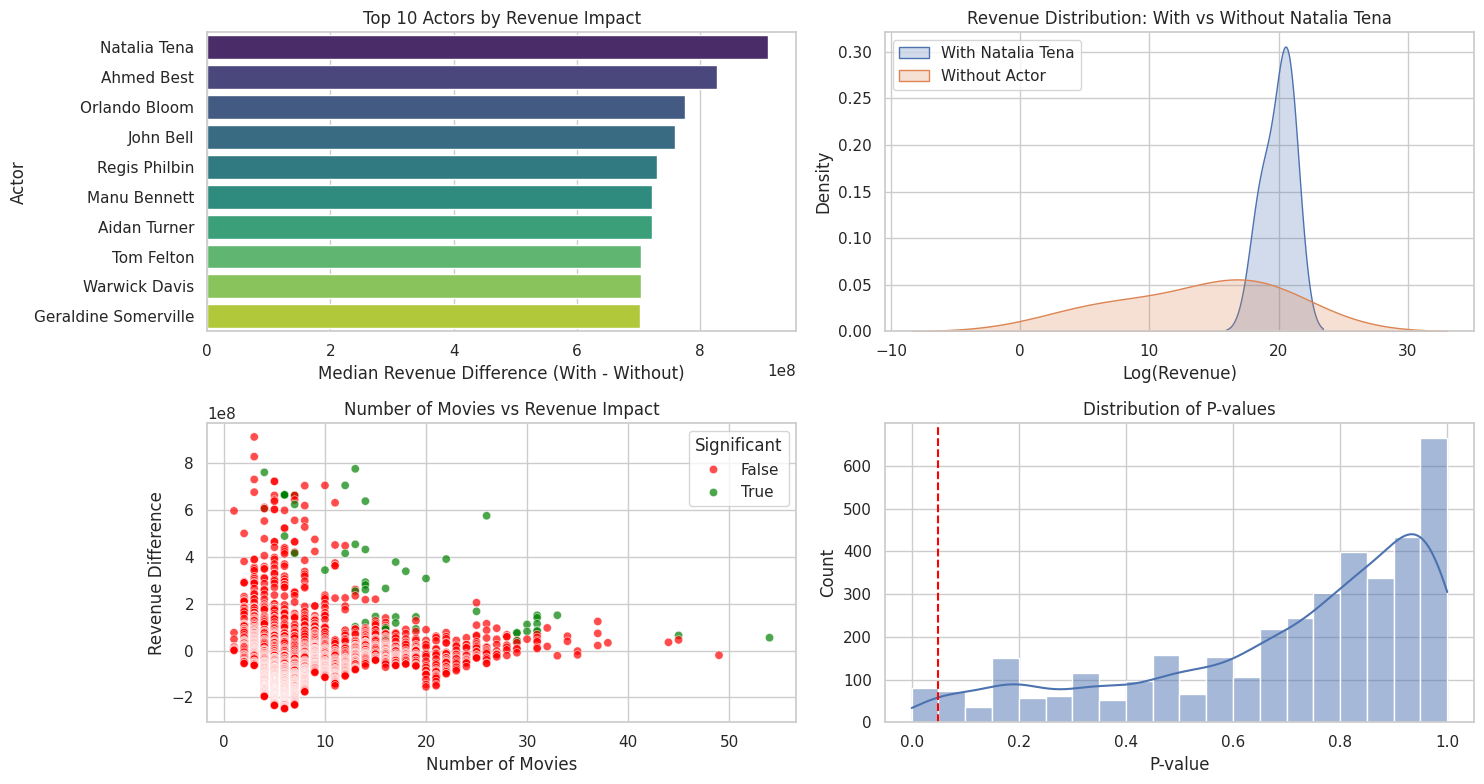

In [64]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Load the datasets
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

# Parse the cast column
credits['cast'] = credits['cast'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

# Explode the cast column to get one row per actor per movie
cast_exploded = credits.explode('cast')
cast_exploded['actor_name'] = cast_exploded['cast'].apply(lambda x: x['name'] if isinstance(x, dict) else None)
cast_exploded = cast_exploded.dropna(subset=['actor_name'])

# Filter actors who appear in at least 5 movies
actor_counts = cast_exploded['actor_name'].value_counts()
frequent_actors = actor_counts[actor_counts >= 5].index

# Merge with movie revenue data
merged_df = cast_exploded.merge(movies[['id', 'revenue']], left_on='movie_id', right_on='id', how='inner')
merged_df = merged_df[merged_df['revenue'].notna() & (merged_df['revenue'] > 0)]

# Analyze each actor
actor_impact = []
for actor in frequent_actors:
    with_actor = merged_df[merged_df['actor_name'] == actor]['revenue']
    without_actor = merged_df[merged_df['actor_name'] != actor]['revenue'].sample(n=len(with_actor), random_state=42)

    median_with = with_actor.median()
    median_without = without_actor.median()
    diff = median_with - median_without
    stat, p = mannwhitneyu(with_actor, without_actor, alternative='greater')

    actor_impact.append({
        'actor': actor,
        'movies_with': len(with_actor),
        'median_with': median_with,
        'median_without': median_without,
        'difference': diff,
        'P-value': p
    })

# Convert to a DataFrame and sort by impact
impact_df = pd.DataFrame(actor_impact)
impact_df = impact_df.sort_values(by='difference', ascending=False)

# Show the top 10 actors
print(impact_df.head(10))

# --------------------------
# VISUALIZATIONS
# --------------------------

# Set style
impact_df['Significant'] = impact_df['P-value'] < 0.05

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# 1. Top 10 Actors by Revenue Impact
plt.subplot(2, 2, 1)
top_actors = impact_df.head(10)
sns.barplot(x='difference', y='actor', data=top_actors, palette='viridis')
plt.title('Top 10 Actors by Revenue Impact')
plt.xlabel('Median Revenue Difference (With - Without)')
plt.ylabel('Actor')

# 2. Distribution Comparison for Top Actor
plt.subplot(2, 2, 2)
top_actor = impact_df.iloc[0]['actor']
with_actor = merged_df[merged_df['actor_name'] == top_actor]['revenue']
without_actor = merged_df[merged_df['actor_name'] != top_actor]['revenue'].sample(n=len(with_actor), random_state=42)

sns.kdeplot(np.log1p(with_actor), label=f'With {top_actor}', fill=True)
sns.kdeplot(np.log1p(without_actor), label='Without Actor', fill=True)
plt.title(f'Revenue Distribution: With vs Without {top_actor}')
plt.xlabel('Log(Revenue)')
plt.ylabel('Density')
plt.legend()

# 3. Number of Movies vs Revenue Impact
plt.subplot(2, 2, 3)
sns.scatterplot(
    x='movies_with',
    y='difference',
    data=impact_df,
    hue='Significant',
    palette={True: 'green', False: 'red'},
    alpha=0.7
)
plt.title('Number of Movies vs Revenue Impact')
plt.xlabel('Number of Movies')
plt.ylabel('Revenue Difference')

# 4. P-value Distribution
plt.subplot(2, 2, 4)
sns.histplot(impact_df['P-value'], bins=20, kde=True)
plt.axvline(0.05, color='red', linestyle='--')
plt.title('Distribution of P-values')
plt.xlabel('P-value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Do movies with a runtime longer than 2 hours have higher popularity scores than shorter movies?

Statistic: 2491578.0, P-value: 2.9243965317411776e-55
Median Popularity (Long Movies): 22.944999000000003
Median Popularity (Short Movies): 11.195593


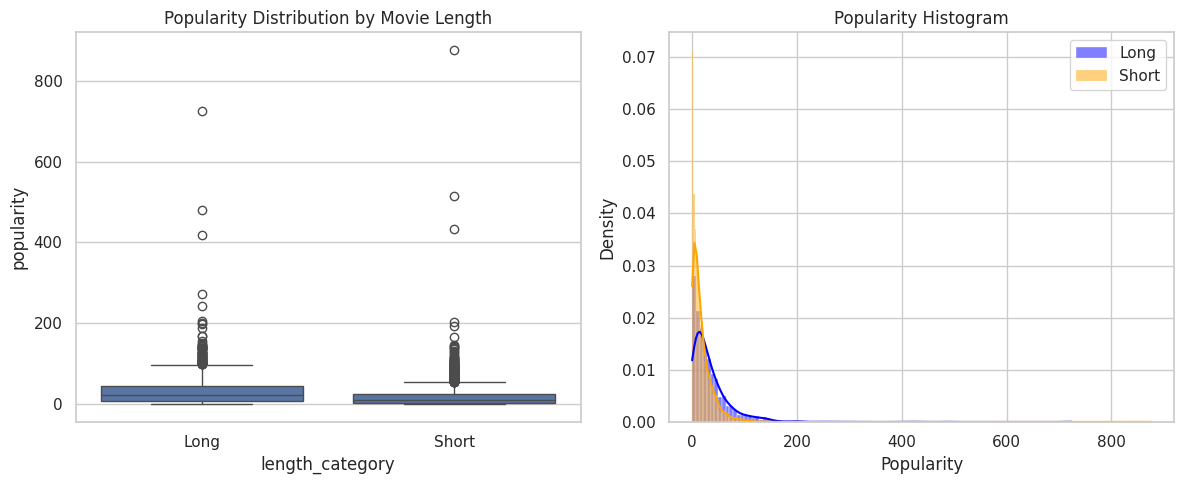

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Load data
movies = pd.read_csv('tmdb_5000_movies.csv')
movies['runtime'] = pd.to_numeric(movies['runtime'], errors='coerce')
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')

# Segment movies
long_movies = movies[movies['runtime'] > 120]['popularity']
short_movies = movies[movies['runtime'] <= 120]['popularity']

# Mann-Whitney U Test
stat, p = mannwhitneyu(long_movies, short_movies, alternative='two-sided')
print(f"Statistic: {stat}, P-value: {p}")
median_long = long_movies.median()
median_short = short_movies.median()
print(f"Median Popularity (Long Movies): {median_long}")
print(f"Median Popularity (Short Movies): {median_short}")

# Add a label column
movies['length_category'] = ['Long' if r > 120 else 'Short' for r in movies['runtime']]

# --- Plotting ---
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='length_category', y='popularity', data=movies)
plt.title("Popularity Distribution by Movie Length")

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(long_movies, color='blue', kde=True, label='Long', stat="density")
sns.histplot(short_movies, color='orange', kde=True, label='Short', stat="density")
plt.title("Popularity Histogram")
plt.xlabel("Popularity")
plt.legend()

plt.tight_layout()
plt.show()

movies with a runtime longer than 2 hours tend to have higher popularity scores than shorter movies

Do movies in English have higher vote counts than movies in other languages?

Statistic: 873697.5, P-value: 2.4823848843704464e-18


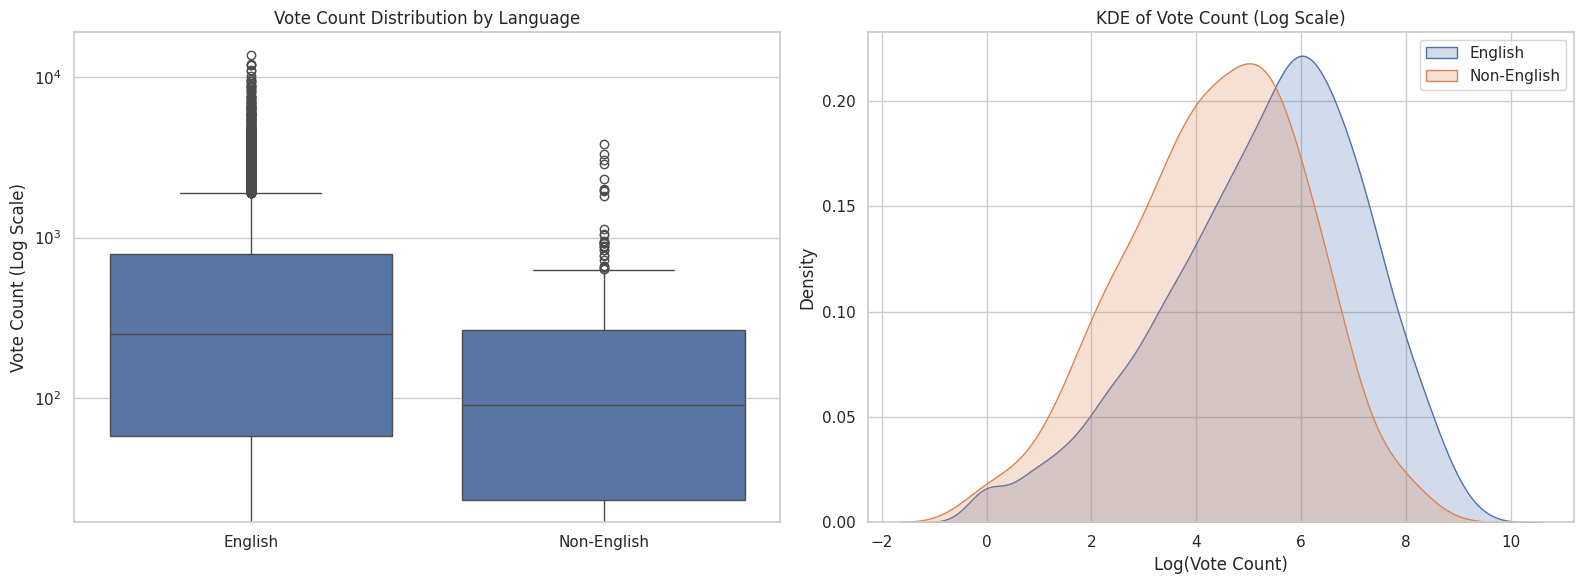

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import numpy as np

# Assuming movies DataFrame is already loaded

# Separate vote counts
english = movies[movies['original_language'] == 'en']['vote_count']
non_english = movies[movies['original_language'] != 'en']['vote_count']

# Mann-Whitney U Test
stat, p = mannwhitneyu(english, non_english, alternative='two-sided')
print(f"Statistic: {stat}, P-value: {p}")

# --------------------------
# Visualizations
# --------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# 1. Boxplot
plt.subplot(1, 2, 1)
data_box = pd.DataFrame({
    'Vote Count': pd.concat([english, non_english], ignore_index=True),
    'Language': ['English'] * len(english) + ['Non-English'] * len(non_english)
})
sns.boxplot(x='Language', y='Vote Count', data=data_box)
plt.yscale('log')  # Log scale for better visibility
plt.title('Vote Count Distribution by Language')
plt.xlabel('')
plt.ylabel('Vote Count (Log Scale)')

# 2. KDE Plot (smoothed distribution)
plt.subplot(1, 2, 2)
sns.kdeplot(np.log1p(english), label='English', fill=True)
sns.kdeplot(np.log1p(non_english), label='Non-English', fill=True)
plt.title('KDE of Vote Count (Log Scale)')
plt.xlabel('Log(Vote Count)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


A significant difference could highlight the global reach of English-language films, informing marketing strategies.

Do movies with a single production company have lower budgets than those with multiple production companies?

Statistic: 2326918.5, P-value: 1.967943667196352e-46


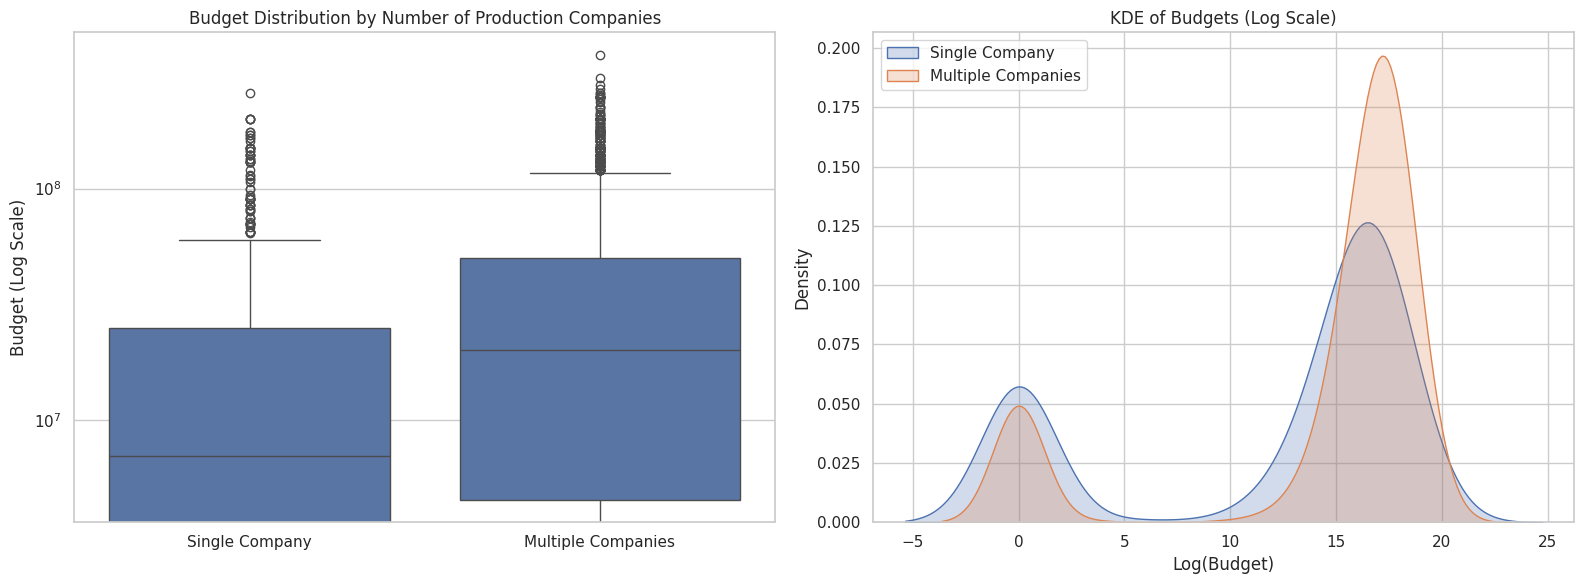

In [66]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import numpy as np

# Load and process data
movies = pd.read_csv('tmdb_5000_movies.csv')
movies['production_companies'] = movies['production_companies'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

# Budget groups
single_company = movies[movies['production_companies'].apply(len) == 1]['budget']
multi_company = movies[movies['production_companies'].apply(len) > 1]['budget']

# Convert to numeric if needed
single_company = pd.to_numeric(single_company, errors='coerce').dropna()
multi_company = pd.to_numeric(multi_company, errors='coerce').dropna()

# Mann-Whitney U Test
stat, p = mannwhitneyu(multi_company, single_company, alternative='two-sided')
print(f"Statistic: {stat}, P-value: {p}")

# -------------------------
# Visualizations
# -------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# 1. Boxplot (with log scale)
plt.subplot(1, 2, 1)
data_box = pd.DataFrame({
    'Budget': pd.concat([single_company, multi_company], ignore_index=True),
    'Type': ['Single Company'] * len(single_company) + ['Multiple Companies'] * len(multi_company)
})
sns.boxplot(x='Type', y='Budget', data=data_box)
plt.yscale('log')
plt.title('Budget Distribution by Number of Production Companies')
plt.ylabel('Budget (Log Scale)')
plt.xlabel('')

# 2. KDE Plot (log scale)
plt.subplot(1, 2, 2)
sns.kdeplot(np.log1p(single_company), label='Single Company', fill=True)
sns.kdeplot(np.log1p(multi_company), label='Multiple Companies', fill=True)
plt.title('KDE of Budgets (Log Scale)')
plt.xlabel('Log(Budget)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


yes

Do movies with a high vote count (>500 votes) have different ratings than those with fewer votes?

Statistic: 3571562.0, P-value: 4.713530757381878e-108


<ipython-input-67-201e79a5133f>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vote Group', y='Vote Average', data=data_box, palette='Set2')


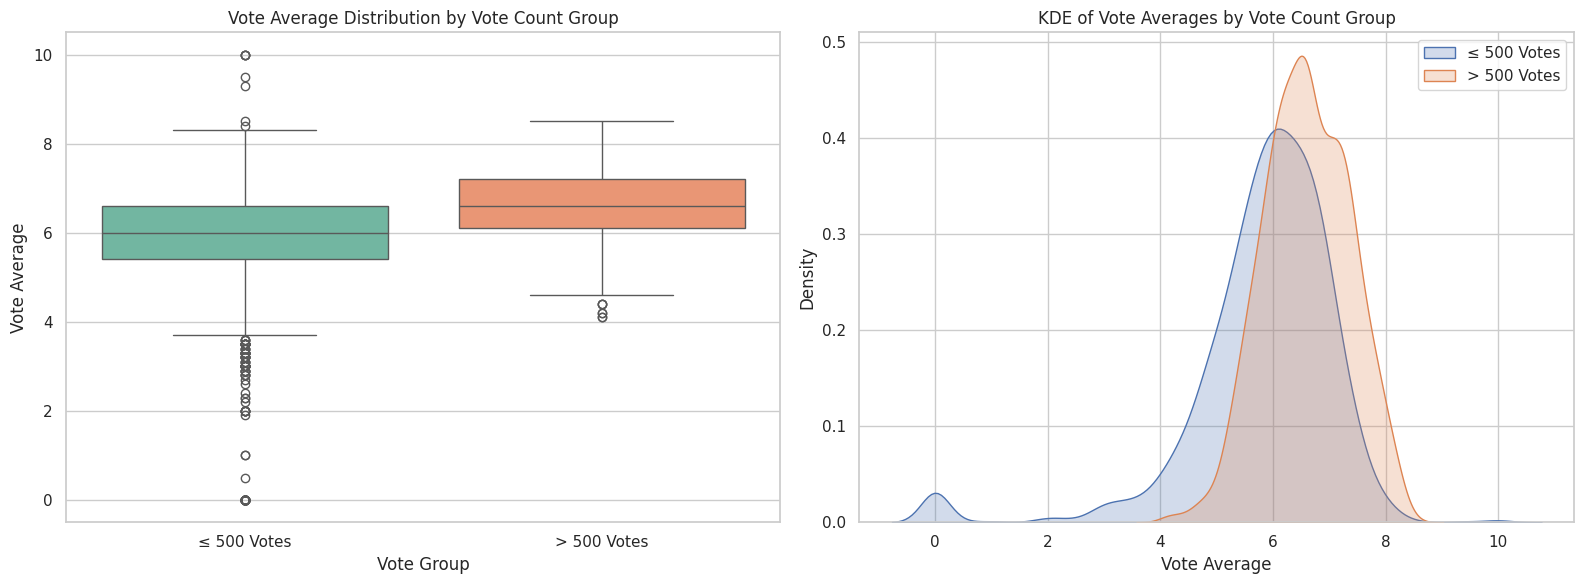

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Load data
movies = pd.read_csv('tmdb_5000_movies.csv')

# Create groups
high_votes = movies[movies['vote_count'] > 500]['vote_average'].dropna()
low_votes = movies[movies['vote_count'] <= 500]['vote_average'].dropna()

# Mann-Whitney U Test
stat, p = mannwhitneyu(high_votes, low_votes, alternative='two-sided')
print(f"Statistic: {stat}, P-value: {p}")

# -------------------------
# Visualizations
# -------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# 1. Boxplot
plt.subplot(1, 2, 1)
data_box = pd.DataFrame({
    'Vote Average': pd.concat([low_votes, high_votes], ignore_index=True),
    'Vote Group': ['≤ 500 Votes'] * len(low_votes) + ['> 500 Votes'] * len(high_votes)
})
sns.boxplot(x='Vote Group', y='Vote Average', data=data_box, palette='Set2')
plt.title('Vote Average Distribution by Vote Count Group')

# 2. KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(low_votes, label='≤ 500 Votes', fill=True)
sns.kdeplot(high_votes, label='> 500 Votes', fill=True)
plt.title('KDE of Vote Averages by Vote Count Group')
plt.xlabel('Vote Average')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


Do movies directed by a specific director have higher popularity than those by other directors?

Statistic: 37035.0000, P-value: 0.0000
Movies directed by Christopher Nolan have significantly higher popularity than others (p < 0.05).
Number of Christopher Nolan movies: 8
Number of other movies: 4794
Median popularity (Christopher Nolan): 113.68
Median popularity (Others): 12.90


<ipython-input-58-3ecd25eb7e1e>:67: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([nolan, others], labels=[director_name, 'Others'], patch_artist=True,


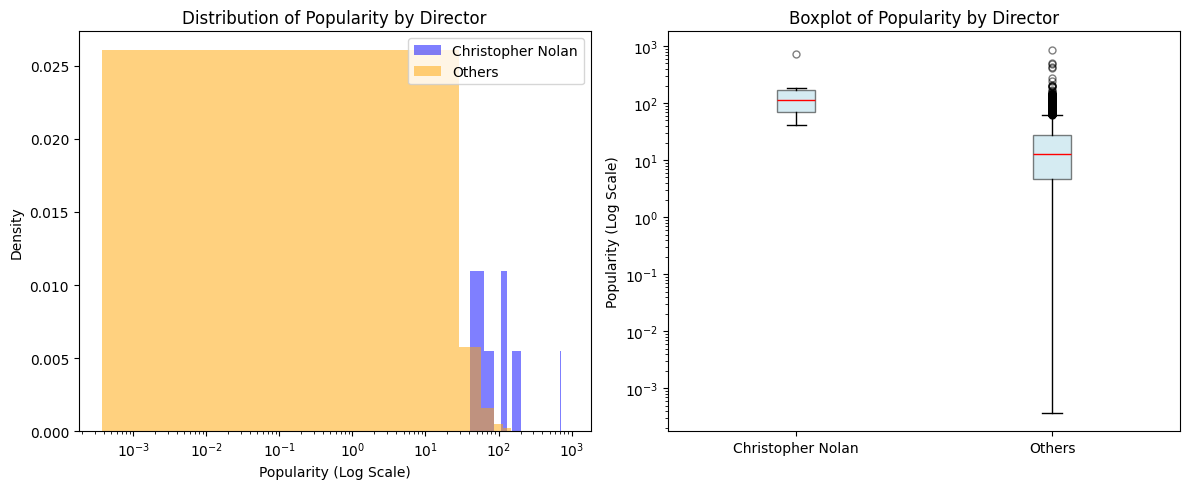

In [58]:
import pandas as pd
import numpy as np
import ast
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

# Load the datasets (replace with your actual file paths)
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

# Filter out movies with missing or invalid popularity
movies = movies.dropna(subset=['popularity'])
movies = movies[movies['popularity'] > 0]  # Ensure positive popularity

# Parse crew column and identify Nolan-directed movies
credits['crew'] = credits['crew'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
director_name = "Christopher Nolan"
credits['is_director'] = credits['crew'].apply(lambda x: any(c['name'] == director_name and c['job'] == 'Director' for c in x))

# Merge datasets
merged = credits.merge(movies[['id', 'popularity']], left_on='movie_id', right_on='id')
merged = merged.dropna(subset=['popularity', 'is_director'])

# Extract popularity for Nolan and others
nolan = merged[merged['is_director'] == True]['popularity']
others = merged[merged['is_director'] == False]['popularity']

# Check if groups are non-empty
if len(nolan) == 0:
    print(f"Warning: No movies found for director '{director_name}'. Please check the dataset.")
    exit()
if len(others) == 0:
    print("Warning: No movies found for other directors. Please check the dataset.")
    exit()

# Perform Mann-Whitney U test (one-sided: Nolan > Others)
stat, p = mannwhitneyu(nolan, others, alternative='greater')
print(f"Statistic: {stat:.4f}, P-value: {p:.4f}")

# Interpret the result
if p < 0.05:
    print(f"Movies directed by {director_name} have significantly higher popularity than others (p < 0.05).")
else:
    print(f"No significant evidence that movies directed by {director_name} have higher popularity than others (p ≥ 0.05).")

# Calculate sample sizes and medians for context
print(f"Number of {director_name} movies: {len(nolan)}")
print(f"Number of other movies: {len(others)}")
print(f"Median popularity ({director_name}): {np.median(nolan):.2f}")
print(f"Median popularity (Others): {np.median(others):.2f}")

# Plotting
# Create a figure with two subplots (histogram and boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
ax1.hist(nolan, bins=30, alpha=0.5, label=director_name, color='blue', density=True)
ax1.hist(others, bins=30, alpha=0.5, label='Others', color='orange', density=True)
ax1.set_xlabel('Popularity (Log Scale)')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Popularity by Director')
ax1.legend()
# Use log scale for x-axis due to skewed popularity
ax1.set_xscale('log')

# Boxplot
ax2.boxplot([nolan, others], labels=[director_name, 'Others'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.5),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markersize=5, alpha=0.5))
ax2.set_ylabel('Popularity')
ax2.set_title('Boxplot of Popularity by Director')
# Use log scale for y-axis to handle skewed popularity
ax2.set_yscale('log')
ax2.set_ylabel('Popularity (Log Scale)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('popularity_by_director_plot.png')

# Show the plot
plt.show()

yes

Kruskall walis Test and its applications

Do movies in different genres (e.g., Action, Comedy, Drama) have different popularity scores?

Statistic: 209.9034, P-value: 0.0000
There is a significant difference in popularity across genres (p < 0.05).
Number of Action movies: 1154
Median popularity (Action): 19.79
Number of Comedy movies: 1722
Median popularity (Comedy): 11.62
Number of Drama movies: 2297
Median popularity (Drama): 10.56
Number of Romance movies: 894
Median popularity (Romance): 10.39


<ipython-input-57-43c16003cb2c>:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(genre_groups, labels=genres, patch_artist=True,


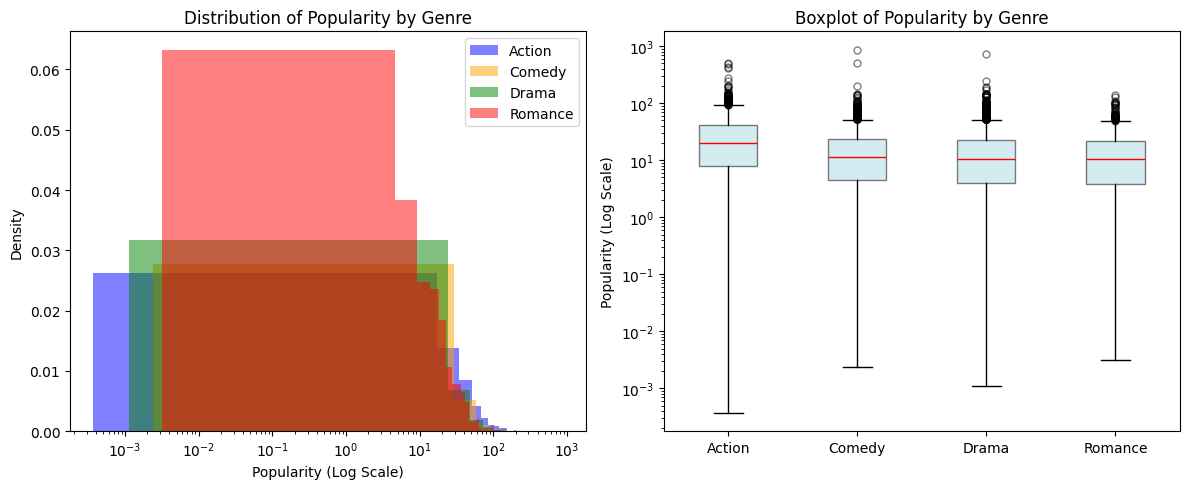

In [57]:
import pandas as pd
import numpy as np
import ast
from scipy.stats import kruskal
import matplotlib.pyplot as plt

# Load the movies dataset (replace with your actual file path)
movies = pd.read_csv('tmdb_5000_movies.csv')

# Filter out movies with missing or invalid popularity
movies = movies.dropna(subset=['popularity'])
movies = movies[movies['popularity'] > 0]  # Ensure positive popularity

# Parse genres column and explode to create one row per genre
movies['genres'] = movies['genres'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
movies_exploded = movies.explode('genres')
movies_exploded['genre_name'] = movies_exploded['genres'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

# Filter out rows with missing or invalid genre names
movies_exploded = movies_exploded.dropna(subset=['genre_name'])
movies_exploded = movies_exploded[movies_exploded['genre_name'] != '']

# Define groups for specific genres: Action, Comedy, Drama, Romance
genres = ['Action', 'Comedy', 'Drama', 'Romance']
genre_groups = [movies_exploded[movies_exploded['genre_name'] == g]['popularity'] for g in genres]

# Check if groups are non-empty
for genre, group in zip(genres, genre_groups):
    if len(group) == 0:
        print(f"Warning: No movies found for genre '{genre}'. Please check the dataset.")
        exit()

# Perform Kruskal-Wallis test
stat, p = kruskal(*genre_groups)
print(f"Statistic: {stat:.4f}, P-value: {p:.4f}")

# Interpret the result
if p < 0.05:
    print("There is a significant difference in popularity across genres (p < 0.05).")
else:
    print("No significant difference in popularity across genres (p ≥ 0.05).")

# Calculate sample sizes and medians for context
for genre, group in zip(genres, genre_groups):
    print(f"Number of {genre} movies: {len(group)}")
    print(f"Median popularity ({genre}): {np.median(group):.2f}")

# Plotting
# Create a figure with two subplots (histogram and boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
for genre, group, color in zip(genres, genre_groups, ['blue', 'orange', 'green', 'red']):
    ax1.hist(group, bins=30, alpha=0.5, label=genre, color=color, density=True)
ax1.set_xlabel('Popularity (Log Scale)')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Popularity by Genre')
ax1.legend()
# Use log scale for x-axis due to skewed popularity
ax1.set_xscale('log')

# Boxplot
ax2.boxplot(genre_groups, labels=genres, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.5),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markersize=5, alpha=0.5))
ax2.set_ylabel('Popularity')
ax2.set_title('Boxplot of Popularity by Genre')
# Use log scale for y-axis to handle skewed popularity
ax2.set_yscale('log')
ax2.set_ylabel('Popularity (Log Scale)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('popularity_by_genre_plot.png')

# Show the plot
plt.show()

There is a high significance difference in popularity among different genres

Do movies released in different quarters of the year (Q1, Q2, Q3, Q4) have different vote averages?

Statistic: 71.0700, P-value: 0.0000
There is a significant difference in vote average across quarters (p < 0.05).
Number of Q1 (Jan-Mar) releases: 1063
Median vote average (Q1 (Jan-Mar)): 6.00
Number of Q2 (Apr-Jun) releases: 1085
Median vote average (Q2 (Apr-Jun)): 6.20
Number of Q3 (Jul-Sep) releases: 1350
Median vote average (Q3 (Jul-Sep)): 6.20
Number of Q4 (Oct-Dec) releases: 1242
Median vote average (Q4 (Oct-Dec)): 6.40


<ipython-input-56-fa4655eb72ec>:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(quarter_groups, labels=quarters, patch_artist=True,


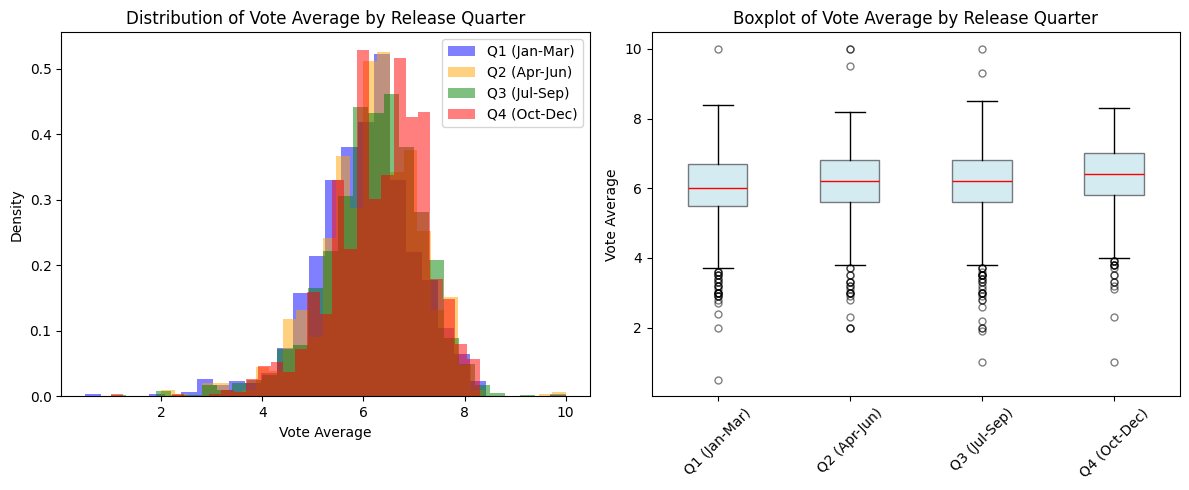

In [56]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import matplotlib.pyplot as plt

# Load the movies dataset (replace with your actual file path)
movies = pd.read_csv('tmdb_5000_movies.csv')

# Filter out movies with missing or invalid data
movies = movies.dropna(subset=['release_date', 'vote_average'])
movies = movies[movies['vote_average'] > 0]  # Ensure positive vote average

# Convert release_date to datetime and extract quarter
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies = movies.dropna(subset=['release_date'])  # Drop rows where release_date couldn't be parsed
movies['quarter'] = movies['release_date'].dt.quarter

# Define groups for each quarter (Q1, Q2, Q3, Q4)
q1 = movies[movies['quarter'] == 1]['vote_average']
q2 = movies[movies['quarter'] == 2]['vote_average']
q3 = movies[movies['quarter'] == 3]['vote_average']
q4 = movies[movies['quarter'] == 4]['vote_average']

# Perform Kruskal-Wallis test
stat, p = kruskal(q1, q2, q3, q4)
print(f"Statistic: {stat:.4f}, P-value: {p:.4f}")

# Interpret the result
if p < 0.05:
    print("There is a significant difference in vote average across quarters (p < 0.05).")
else:
    print("No significant difference in vote average across quarters (p ≥ 0.05).")

# Calculate sample sizes and medians for context
quarters = ['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)']
quarter_groups = [q1, q2, q3, q4]
for quarter, group in zip(quarters, quarter_groups):
    print(f"Number of {quarter} releases: {len(group)}")
    print(f"Median vote average ({quarter}): {np.median(group):.2f}")

# Plotting
# Create a figure with two subplots (histogram and boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
for quarter, group, color in zip(quarters, quarter_groups, ['blue', 'orange', 'green', 'red']):
    ax1.hist(group, bins=30, alpha=0.5, label=quarter, color=color, density=True)
ax1.set_xlabel('Vote Average')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Vote Average by Release Quarter')
ax1.legend()
# Optional: Use log scale for x-axis if needed (unlikely for vote_average)
# ax1.set_xscale('log')
# ax1.set_xlabel('Vote Average (Log Scale)')

# Boxplot
ax2.boxplot(quarter_groups, labels=quarters, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.5),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markersize=5, alpha=0.5))
ax2.set_ylabel('Vote Average')
ax2.set_title('Boxplot of Vote Average by Release Quarter')
# Rotate x-axis labels for better readability
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('vote_average_by_quarter_plot.png')

# Show the plot
plt.show()

Yes

Do movies released on different days of the week (e.g., Friday, Wednesday, Monday) have different revenues?

Statistic: 91.0022, P-value: 0.0000
There is a significant difference in revenue across release days (p < 0.05).
Number of Friday releases: 1403
Median revenue (Friday): 38376497.00
Number of Wednesday releases: 618
Median revenue (Wednesday): 83312165.00
Number of Monday releases: 163
Median revenue (Monday): 42365581.00


<ipython-input-55-cc987fe15989>:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(day_groups, labels=days, patch_artist=True,


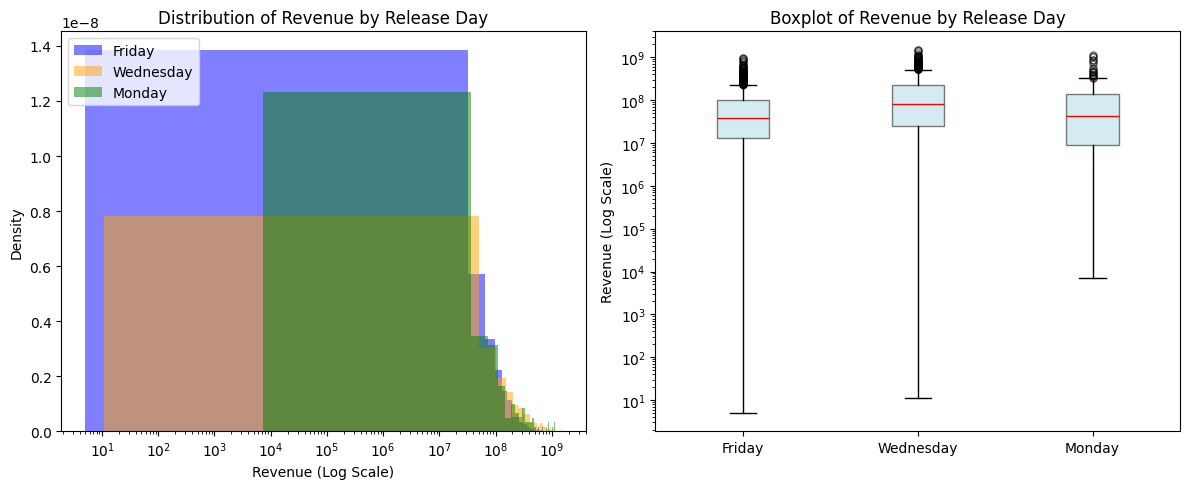

In [55]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import matplotlib.pyplot as plt

# Load the movies dataset (replace with your actual file path)
movies = pd.read_csv('tmdb_5000_movies.csv')

# Filter out movies with missing or invalid data
movies = movies.dropna(subset=['release_date', 'revenue'])
movies = movies[movies['revenue'] > 0]  # Ensure positive revenue

# Convert release_date to datetime and extract day of week
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['day_of_week'] = movies['release_date'].dt.day_name()

# Define groups for Friday, Wednesday, Monday
days = ['Friday', 'Wednesday', 'Monday']
day_groups = [movies[movies['day_of_week'] == d]['revenue'] for d in days]

# Perform Kruskal-Wallis test
stat, p = kruskal(*day_groups)
print(f"Statistic: {stat:.4f}, P-value: {p:.4f}")

# Interpret the result
if p < 0.05:
    print("There is a significant difference in revenue across release days (p < 0.05).")
else:
    print("No significant difference in revenue across release days (p ≥ 0.05).")

# Calculate sample sizes and medians for context
for day, group in zip(days, day_groups):
    print(f"Number of {day} releases: {len(group)}")
    print(f"Median revenue ({day}): {np.median(group):.2f}")

# Plotting
# Create a figure with two subplots (histogram and boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
for day, group, color in zip(days, day_groups, ['blue', 'orange', 'green']):
    ax1.hist(group, bins=30, alpha=0.5, label=day, color=color, density=True)
ax1.set_xlabel('Revenue')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Revenue by Release Day')
ax1.legend()
# Use log scale for x-axis due to skewed revenue
ax1.set_xscale('log')
ax1.set_xlabel('Revenue (Log Scale)')

# Boxplot
ax2.boxplot(day_groups, labels=days, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.5),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markersize=5, alpha=0.5))
ax2.set_ylabel('Revenue')
ax2.set_title('Boxplot of Revenue by Release Day')
# Use log scale for y-axis to handle skewed revenue
ax2.set_yscale('log')
ax2.set_ylabel('Revenue (Log Scale)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot (optional)
plt.savefig('revenue_by_release_day_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

yes

Do movies with different cast sizes (e.g., small, medium, large) have different popularity scores?

Statistic: 1312.7017, P-value: 0.0000
There is a significant difference in popularity across cast size categories (p < 0.05).
Number of Small cast movies: 1037
Number of Medium cast movies: 2050
Number of Large cast movies: 1715
Median popularity (Small): 3.22
Median popularity (Medium): 12.31
Median popularity (Large): 25.04


<ipython-input-54-62b3188ecd3a>:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([g1, g2, g3], labels=['Small', 'Medium', 'Large'], patch_artist=True,


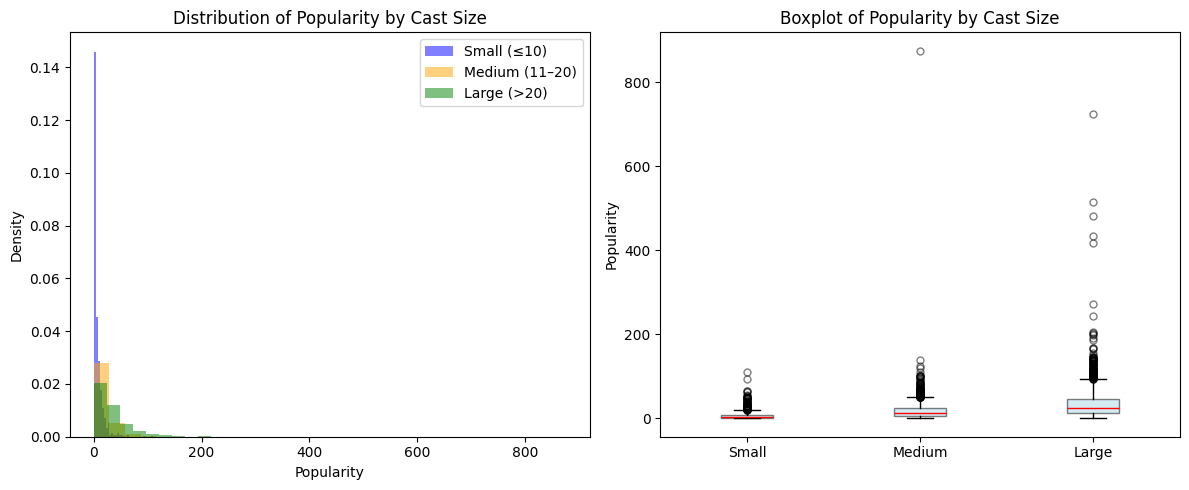

In [54]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import matplotlib.pyplot as plt

# Load the datasets (replace with your actual file paths)
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

# Parse cast column and calculate cast size
credits['cast'] = credits['cast'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
credits['cast_size'] = credits['cast'].apply(len)

# Categorize cast size into Small (≤10), Medium (11–20), Large (>20)
credits['cast_category'] = pd.cut(credits['cast_size'], bins=[0, 10, 20, float('inf')],
                                 labels=['Small', 'Medium', 'Large'], include_lowest=True)

# Merge with movies to get popularity
merged = credits.merge(movies[['id', 'popularity']], left_on='movie_id', right_on='id')

# Filter out missing or invalid data
merged = merged.dropna(subset=['popularity', 'cast_category'])
merged = merged[merged['popularity'] > 0]  # Ensure positive popularity

# Extract popularity for each cast size category
g1 = merged[merged['cast_category'] == 'Small']['popularity']
g2 = merged[merged['cast_category'] == 'Medium']['popularity']
g3 = merged[merged['cast_category'] == 'Large']['popularity']

# Perform Kruskal-Wallis test
stat, p = kruskal(g1, g2, g3)
print(f"Statistic: {stat:.4f}, P-value: {p:.4f}")

# Interpret the result
if p < 0.05:
    print("There is a significant difference in popularity across cast size categories (p < 0.05).")
else:
    print("No significant difference in popularity across cast size categories (p ≥ 0.05).")

# Calculate sample sizes and medians for context
print(f"Number of Small cast movies: {len(g1)}")
print(f"Number of Medium cast movies: {len(g2)}")
print(f"Number of Large cast movies: {len(g3)}")
print(f"Median popularity (Small): {np.median(g1):.2f}")
print(f"Median popularity (Medium): {np.median(g2):.2f}")
print(f"Median popularity (Large): {np.median(g3):.2f}")

# Plotting
# Create a figure with two subplots (histogram and boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
ax1.hist(g1, bins=30, alpha=0.5, label='Small (≤10)', color='blue', density=True)
ax1.hist(g2, bins=30, alpha=0.5, label='Medium (11–20)', color='orange', density=True)
ax1.hist(g3, bins=30, alpha=0.5, label='Large (>20)', color='green', density=True)
ax1.set_xlabel('Popularity')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Popularity by Cast Size')
ax1.legend()
# Optional: Use log scale for x-axis if popularity is highly skewed
# ax1.set_xscale('log')
# ax1.set_xlabel('Popularity (Log Scale)')

# Boxplot
ax2.boxplot([g1, g2, g3], labels=['Small', 'Medium', 'Large'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.5),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markersize=5, alpha=0.5))
ax2.set_ylabel('Popularity')
ax2.set_title('Boxplot of Popularity by Cast Size')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot (optional)
plt.savefig('popularity_by_cast_size_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

yes

permutation test and its applications

Do movies with higher budgets have a higher revenue-to-budget ratio than movies with lower budgets?

In [43]:
import pandas as pd
import numpy as np

# Load the movies dataset (replace with your actual file path)
movies = pd.read_csv('tmdb_5000_movies.csv')

# Filter out movies with missing or invalid data
movies = movies.dropna(subset=['budget', 'revenue'])
movies = movies[(movies['budget'] > 0) & (movies['revenue'] > 0)]  # Ensure positive values

# Calculate revenue-to-budget ratio
movies['revenue_budget_ratio'] = movies['revenue'] / movies['budget']

# Define groups: high-budget (above median) vs. low-budget (below median)
median_budget = movies['budget'].median()
high_budget = movies[movies['budget'] > median_budget]['revenue_budget_ratio'].values
low_budget = movies[movies['budget'] <= median_budget]['revenue_budget_ratio'].values

# Calculate observed test statistic (difference in mean revenue-to-budget ratio)
observed_diff = np.mean(high_budget) - np.mean(low_budget)

# Combine data for permutation
all_ratios = np.concatenate([high_budget, low_budget])
n_high = len(high_budget)
n_total = len(all_ratios)

# Perform permutation test
n_permutations = 10000
perm_diffs = np.zeros(n_permutations)

for i in range(n_permutations):
    # Shuffle the data
    np.random.shuffle(all_ratios)
    # Split into permuted groups
    perm_high = all_ratios[:n_high]
    perm_low = all_ratios[n_high:]
    # Calculate difference in means
    perm_diffs[i] = np.mean(perm_high) - np.mean(perm_low)

# Calculate two-sided p-value
p_value = np.sum(np.abs(perm_diffs) >= np.abs(observed_diff)) / n_permutations

# Calculate median ratios for interpretation
median_high = np.median(high_budget)
median_low = np.median(low_budget)

# Print results
print(f"Number of high-budget movies (> median): {len(high_budget)}")
print(f"Number of low-budget movies (≤ median): {len(low_budget)}")
print(f"Observed difference in mean revenue-to-budget ratio: {observed_diff:.2f}")
print(f"Median revenue-to-budget ratio (high budget): {median_high:.2f}")
print(f"Median revenue-to-budget ratio (low budget): {median_low:.2f}")
print(f"P-value (permutation test): {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("High-budget movies have a significantly different revenue-to-budget ratio than low-budget movies (p < 0.05).")
    if observed_diff > 0:
        print("High-budget movies tend to have a higher revenue-to-budget ratio.")
    else:
        print("Low-budget movies tend to have a higher revenue-to-budget ratio.")
else:
    print("No significant evidence that high-budget movies have a different revenue-to-budget ratio than low-budget movies (p ≥ 0.05).")

Number of high-budget movies (> median): 1605
Number of low-budget movies (≤ median): 1624
Observed difference in mean revenue-to-budget ratio: -5869.71
Median revenue-to-budget ratio (high budget): 2.15
Median revenue-to-budget ratio (low budget): 2.63
P-value (permutation test): 0.2437
No significant evidence that high-budget movies have a different revenue-to-budget ratio than low-budget movies (p ≥ 0.05).


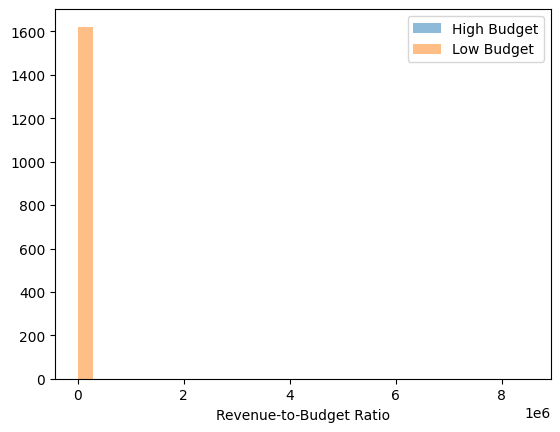

In [44]:
import matplotlib.pyplot as plt
plt.hist(high_budget, bins=30, alpha=0.5, label='High Budget')
plt.hist(low_budget, bins=30, alpha=0.5, label='Low Budget')
plt.xlabel('Revenue-to-Budget Ratio')
plt.legend()
plt.show()

Do movies released on weekends have a higher vote count per runtime minute than movies released on weekdays?

Number of weekend releases: 2462
Number of weekday releases: 2255
Observed difference in mean vote count per minute: -3.8315
Median vote count per minute (weekend): 1.6804
Median vote count per minute (weekday): 3.5000
P-value (permutation test): 0.0000
Weekend releases have a significantly different vote count per runtime minute than weekday releases (p < 0.05).
Weekday releases tend to have a higher vote count per minute.


<ipython-input-49-c4e5162ad13a>:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([weekend_votes, weekday_votes], labels=['Weekend', 'Weekday'], patch_artist=True,


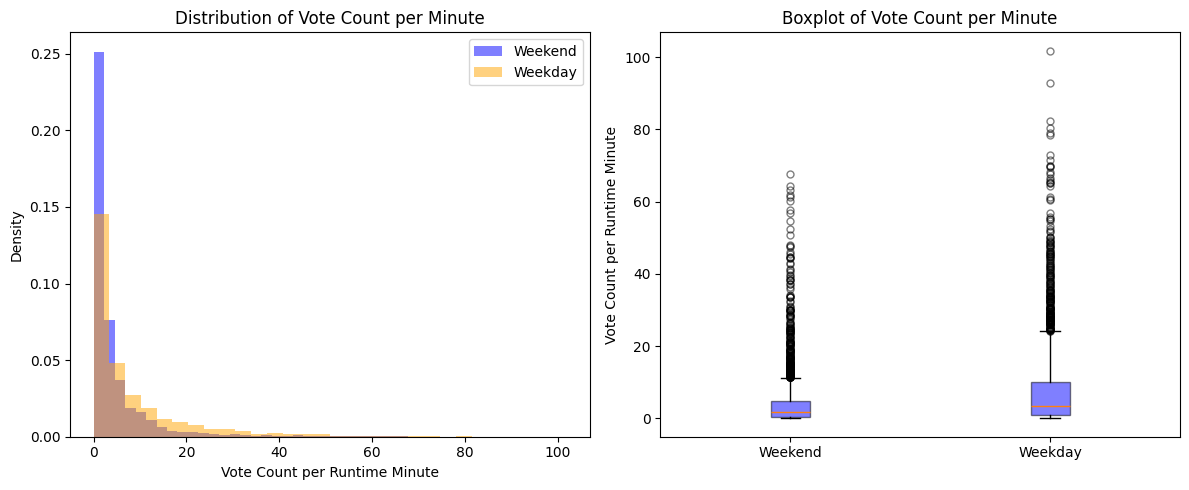

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the movies dataset (replace with your actual file path)
movies = pd.read_csv('tmdb_5000_movies.csv')

# Filter out movies with missing or invalid data
movies = movies.dropna(subset=['release_date', 'vote_count', 'runtime'])
movies = movies[(movies['vote_count'] > 0) & (movies['runtime'] > 0)]  # Ensure positive values

# Convert release_date to datetime and extract day of week
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['day_of_week'] = movies['release_date'].dt.day_name()

# Calculate vote count per runtime minute
movies['vote_per_minute'] = movies['vote_count'] / movies['runtime']

# Define weekend (Friday–Sunday) and weekday (Monday–Thursday) groups
weekend = movies[movies['day_of_week'].isin(['Friday', 'Saturday', 'Sunday'])]
weekday = movies[movies['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday'])]

# Extract vote count per minute for each group
weekend_votes = weekend['vote_per_minute'].values
weekday_votes = weekday['vote_per_minute'].values

# Calculate observed test statistic (difference in mean vote count per minute)
observed_diff = np.mean(weekend_votes) - np.mean(weekday_votes)

# Combine data for permutation
all_votes = np.concatenate([weekend_votes, weekday_votes])
n_weekend = len(weekend_votes)
n_total = len(all_votes)

# Perform permutation test
n_permutations = 10000
perm_diffs = np.zeros(n_permutations)

for i in range(n_permutations):
    # Shuffle the data
    np.random.shuffle(all_votes)
    # Split into permuted groups
    perm_weekend = all_votes[:n_weekend]
    perm_weekday = all_votes[n_weekend:]
    # Calculate difference in means
    perm_diffs[i] = np.mean(perm_weekend) - np.mean(perm_weekday)

# Calculate two-sided p-value
p_value = np.sum(np.abs(perm_diffs) >= np.abs(observed_diff)) / n_permutations

# Calculate median ratios for interpretation
median_weekend = np.median(weekend_votes)
median_weekday = np.median(weekday_votes)

# Print results
print(f"Number of weekend releases: {len(weekend_votes)}")
print(f"Number of weekday releases: {len(weekday_votes)}")
print(f"Observed difference in mean vote count per minute: {observed_diff:.4f}")
print(f"Median vote count per minute (weekend): {median_weekend:.4f}")
print(f"Median vote count per minute (weekday): {median_weekday:.4f}")
print(f"P-value (permutation test): {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("Weekend releases have a significantly different vote count per runtime minute than weekday releases (p < 0.05).")
    if observed_diff > 0:
        print("Weekend releases tend to have a higher vote count per minute.")
    else:
        print("Weekday releases tend to have a higher vote count per minute.")
else:
    print("No significant evidence that weekend releases have a different vote count per minute than weekday releases (p ≥ 0.05).")

# Plotting
# Create a figure with two subplots (histogram and boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
ax1.hist(weekend_votes, bins=30, alpha=0.5, label='Weekend', color='blue', density=True)
ax1.hist(weekday_votes, bins=30, alpha=0.5, label='Weekday', color='orange', density=True)
ax1.set_xlabel('Vote Count per Runtime Minute')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Vote Count per Minute')
ax1.legend()
# Optional: Use log scale for x-axis if data is highly skewed
# ax1.set_xscale('log')
# ax1.set_xlabel('Vote Count per Runtime Minute (Log Scale)')

# Boxplot
ax2.boxplot([weekend_votes, weekday_votes], labels=['Weekend', 'Weekday'], patch_artist=True,
            boxprops=dict(facecolor='blue', alpha=0.5),
            flierprops=dict(marker='o', markersize=5, alpha=0.5))
ax2.set_ylabel('Vote Count per Runtime Minute')
ax2.set_title('Boxplot of Vote Count per Minute')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Do movies with a specific director have more consistent (lower variance) popularity scores than movies by other directors?

In [52]:
import pandas as pd
import numpy as np

# Load datasets (replace with your actual file paths)
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

# Parse crew column and extract director
credits['crew'] = credits['crew'].apply(lambda x: eval(x) if pd.notna(x) else [])
credits['director'] = credits['crew'].apply(lambda x: next((c['name'] for c in x if c['job'] == 'Director'), None))

# Merge with movies to get popularity
merged = credits.merge(movies[['id', 'popularity']], left_on='movie_id', right_on='id')
merged = merged.dropna(subset=['popularity', 'director'])
merged = merged[merged['popularity'] > 0]  # Ensure positive popularity

# Define groups: specific director (e.g., Christopher Nolan) vs. others
director_name = 'Christopher Nolan'
nolan_movies = merged[merged['director'] == director_name]['popularity'].values
other_movies = merged[merged['director'] != director_name]['popularity'].values

# Calculate observed test statistic (difference in variance)
observed_diff = np.var(nolan_movies, ddof=1) - np.var(other_movies, ddof=1)

# Combine data for permutation
all_popularity = np.concatenate([nolan_movies, other_movies])
n_nolan = len(nolan_movies)
n_total = len(all_popularity)

# Perform permutation test
n_permutations = 10000
perm_diffs = np.zeros(n_permutations)

for i in range(n_permutations):
    # Shuffle the data
    np.random.shuffle(all_popularity)
    # Split into permuted groups
    perm_nolan = all_popularity[:n_nolan]
    perm_other = all_popularity[n_nolan:]
    # Calculate difference in variances
    perm_diffs[i] = np.var(perm_nolan, ddof=1) - np.var(perm_other, ddof=1)

# Calculate two-sided p-value
p_value = np.sum(np.abs(perm_diffs) >= np.abs(observed_diff)) / n_permutations

# Calculate median popularity for interpretation
median_nolan = np.median(nolan_movies)
median_other = np.median(other_movies)

# Print results
print(f"Number of Nolan movies: {len(nolan_movies)}")
print(f"Number of other movies: {len(other_movies)}")
print(f"Observed difference in popularity variance (Nolan - Others): {observed_diff:.2f}")
print(f"Variance of popularity (Nolan): {np.var(nolan_movies, ddof=1):.2f}")
print(f"Variance of popularity (Others): {np.var(other_movies, ddof=1):.2f}")
print(f"Median popularity (Nolan): {median_nolan:.2f}")
print(f"Median popularity (Others): {median_other:.2f}")
print(f"P-value (permutation test): {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print(f"Movies directed by {director_name} have significantly different popularity variance than other movies (p < 0.05).")
    if observed_diff < 0:
        print(f"{director_name}'s movies have more consistent (lower variance) popularity scores.")
    else:
        print(f"{director_name}'s movies have more variable (higher variance) popularity scores.")
else:
    print(f"No significant evidence that {director_name}'s movies have different popularity variance than other movies (p ≥ 0.05).")

Number of Nolan movies: 8
Number of other movies: 4765
Observed difference in popularity variance (Nolan - Others): 49041.96
Variance of popularity (Nolan): 49940.98
Variance of popularity (Others): 899.02
Median popularity (Nolan): 113.68
Median popularity (Others): 13.06
P-value (permutation test): 0.0032
Movies directed by Christopher Nolan have significantly different popularity variance than other movies (p < 0.05).
Christopher Nolan's movies have more variable (higher variance) popularity scores.


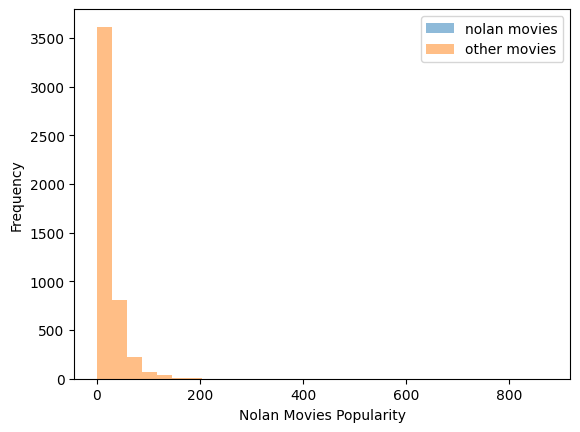

In [53]:
import matplotlib.pyplot as plt
plt.hist(nolan_movies, bins=30, alpha=0.5, label='nolan movies')
plt.hist(other_movies, bins=30, alpha=0.5, label='other movies')
plt.xlabel('Nolan Movies Popularity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Do sequels earn more than their originals?

Wilcoxon p-value: 0.0387


<ipython-input-72-358896a0d663>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pd.melt(pairs[['revenue_original', 'revenue_sequel']]),


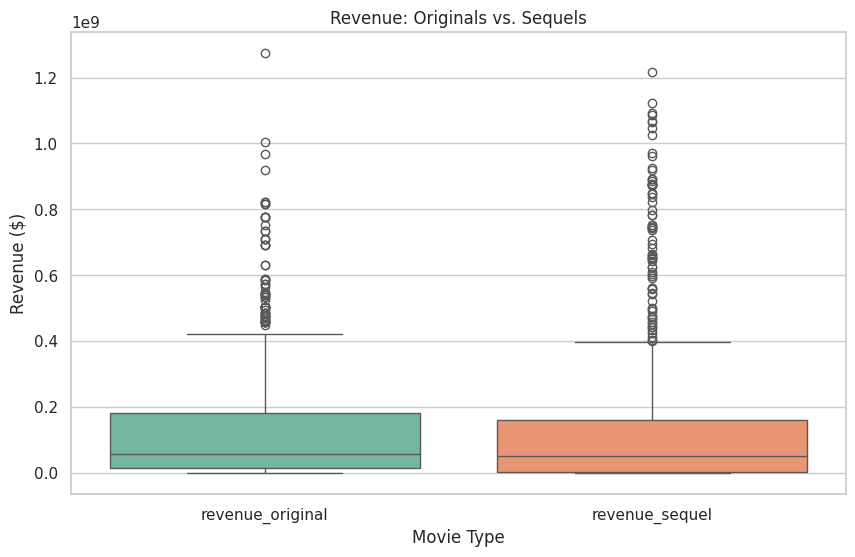

In [72]:

from collections import defaultdict

from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import ast

movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

# Merge on 'title'
df = movies.merge(credits, on='title')

# Lowercase titles for easier match
df['title_lower'] = df['title'].str.lower()

# Build a prefix dictionary: key is title prefix, values are list of titles
prefix_map = defaultdict(list)

for title in df['title_lower']:
    for other_title in df['title_lower']:
        if title != other_title and other_title.startswith(title):
            prefix_map[title].append(other_title)

# Filter potential sequels
potential_franchises = {k: v for k, v in prefix_map.items() if len(v) > 0}

rows = []

for original_title, sequels in potential_franchises.items():
    orig_row = df[df['title_lower'] == original_title].head(1)
    for sequel_title in sequels:
        sequel_row = df[df['title_lower'] == sequel_title].head(1)

        if not orig_row.empty and not sequel_row.empty:
            rows.append({
                'original': orig_row['title'].values[0],
                'sequel': sequel_row['title'].values[0],
                'revenue_original': orig_row['revenue'].values[0],
                'revenue_sequel': sequel_row['revenue'].values[0],
            })

pairs = pd.DataFrame(rows)

stat, p_val = wilcoxon(pairs['revenue_sequel'], pairs['revenue_original'])
print(f"Wilcoxon p-value: {p_val:.4f}")

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.melt(pairs[['revenue_original', 'revenue_sequel']]),
            x='variable', y='value', palette='Set2')
plt.title('Revenue: Originals vs. Sequels')
plt.xlabel('Movie Type')
plt.ylabel('Revenue ($)')
plt.show()



Does revenue change after a director switch in a franchise?

/usr/local/lib/python3.11/dist-packages/scipy/stats/_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


Wilcoxon p-value (Director Change Impact): 0.8658


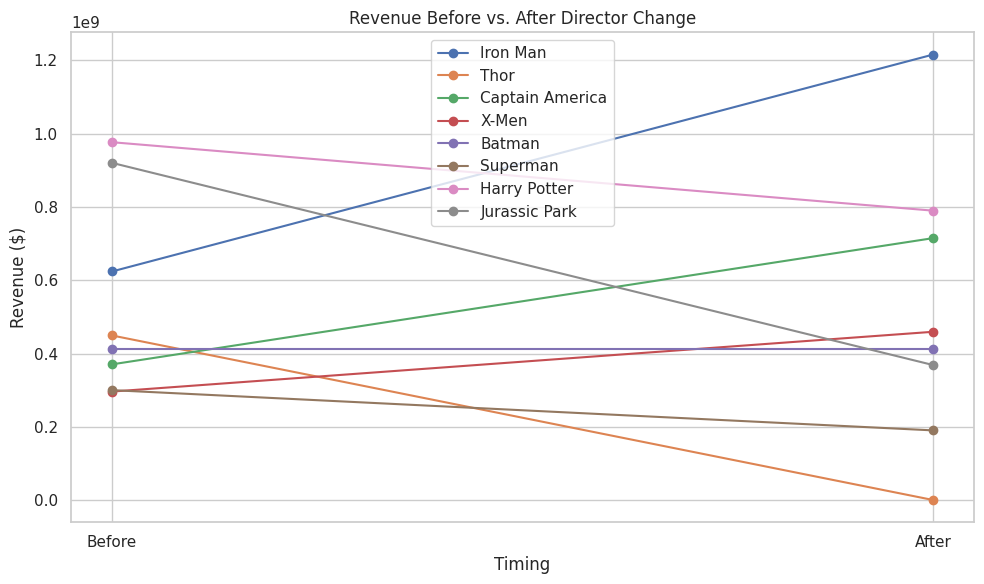

In [73]:
import pandas as pd
import ast
from collections import defaultdict
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

# Load datasets
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

# Merge datasets on title
df = movies.merge(credits, on='title')

# Convert crew column from string to list of dicts
df['crew'] = df['crew'].apply(lambda x: ast.literal_eval(x))

# Extract director from crew list
def get_director(crew_list):
    for member in crew_list:
        if member['job'] == 'Director':
            return member['name']
    return None

df['director'] = df['crew'].apply(get_director)

# Lowercase titles to help detect franchises
df['title_lower'] = df['title'].str.lower()

# Define some known franchises (you can expand this list)
franchise_keywords = [
    'iron man', 'avengers', 'thor', 'captain america',
    'x-men', 'batman', 'superman', 'fast and furious',
    'harry potter', 'star wars', 'jurassic park'
]

# Collect franchise groups
franchise_df = pd.DataFrame()
for keyword in franchise_keywords:
    group = df[df['title_lower'].str.contains(keyword)]
    group = group.copy()
    group['franchise'] = keyword
    franchise_df = pd.concat([franchise_df, group], ignore_index=True)

# Track revenue before and after director switch
director_revenue = defaultdict(list)

for franchise in franchise_df['franchise'].unique():
    group = franchise_df[franchise_df['franchise'] == franchise]
    group = group.sort_values(by='release_date')  # sort by time

    prev_director = None
    for _, row in group.iterrows():
        current_director = row['director']
        current_revenue = row['revenue']

        if pd.isna(current_director) or current_revenue == 0:
            continue  # skip missing info or zero revenue

        if prev_director is None:
            prev_director = current_director
            director_revenue[franchise].append(('before', current_revenue))
        else:
            if current_director != prev_director:
                director_revenue[franchise].append(('after', current_revenue))
                break  # stop after first director change
            else:
                director_revenue[franchise].append(('before', current_revenue))

# Prepare analysis dataframe
analysis_data = []
for franchise, records in director_revenue.items():
    before_revs = [r[1] for r in records if r[0] == 'before']
    after_revs = [r[1] for r in records if r[0] == 'after']

    if before_revs and after_revs:
        analysis_data.append({
            'franchise': franchise.title(),
            'revenue_before': max(before_revs),
            'revenue_after': min(after_revs)
        })

df_directors = pd.DataFrame(analysis_data)

# Wilcoxon test
if not df_directors.empty:
    stat, p_val = wilcoxon(df_directors['revenue_after'], df_directors['revenue_before'])
    print(f"Wilcoxon p-value (Director Change Impact): {p_val:.4f}")
else:
    print("No director change data available for the selected franchises.")

# Plot before vs. after revenues
if not df_directors.empty:
    plt.figure(figsize=(10, 6))
    for idx, row in df_directors.iterrows():
        plt.plot(['Before', 'After'], [row['revenue_before'], row['revenue_after']],
                 marker='o', label=row['franchise'])
    plt.title('Revenue Before vs. After Director Change')
    plt.xlabel('Timing')
    plt.ylabel('Revenue ($)')
    plt.legend()
    plt.tight_layout()
    plt.show()


Does the same actor perform better in action vs. drama films?

Leonardo DiCaprio Action vs Drama p-value: 1.0000


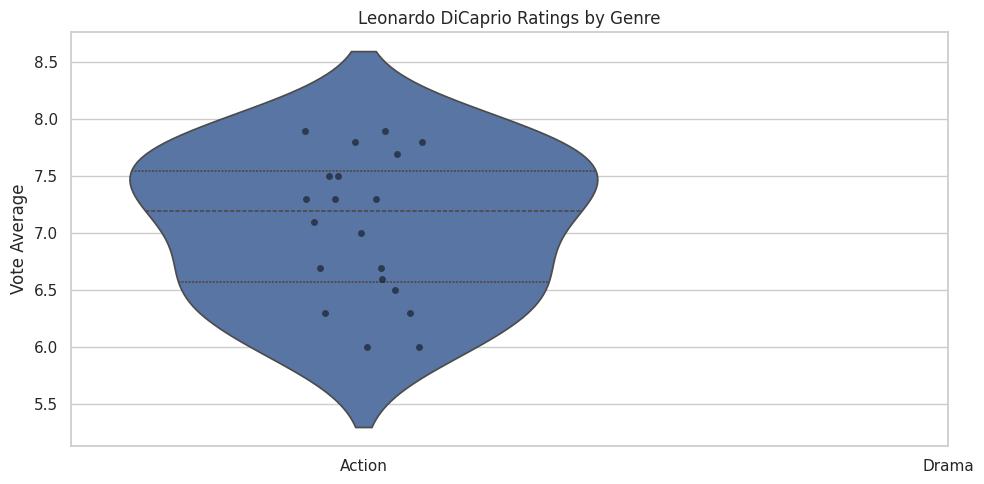

In [76]:
import pandas as pd
import ast
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

# Convert genre and cast columns to Python objects
movies['genres'] = movies['genres'].apply(ast.literal_eval)
credits['cast'] = credits['cast'].apply(ast.literal_eval)

# Extract genre names into a single string for each movie
movies['genre_str'] = movies['genres'].apply(lambda x: ', '.join([g['name'] for g in x]))

# Explode movie-cast pairs to get one row per actor per movie
movie_cast = []
for _, row in credits.iterrows():
    movie_id = row['movie_id']
    title = row['title']
    cast_list = row['cast']
    for actor in cast_list:
        movie_cast.append({'movie_id': movie_id, 'title': title, 'actor_name': actor['name']})

cast_df = pd.DataFrame(movie_cast)

# Merge cast with movie details
merged_df = cast_df.merge(movies[['id', 'title', 'vote_average', 'genre_str']], left_on='movie_id', right_on='id')

# Filter for a specific actor
actor = "Leonardo DiCaprio"

# Get actor's Action and Drama movies
action = merged_df[(merged_df['actor_name'] == actor) &
                   (merged_df['genre_str'].str.contains('Action'))]['vote_average']

drama = merged_df[(merged_df['actor_name'] == actor) &
                  (merged_df['genre_str'].str.contains('Drama'))]['vote_average']

# Check if both genres have enough data
if len(action) > 0 and len(drama) > 0:
    # Balance samples
    n = min(len(action), len(drama))
    stat, p = wilcoxon(action.sample(n, random_state=42), drama.sample(n, random_state=42))
    print(f"{actor} Action vs Drama p-value: {p:.4f}")

    # Raincloud-like plot (violin + strip)
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=[action, drama], inner='quartile')
    sns.stripplot(data=[action, drama], color='black', alpha=0.5)
    plt.xticks([0, 1], ['Action', 'Drama'])
    plt.title(f'{actor} Ratings by Genre')
    plt.ylabel('Vote Average')
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough Action or Drama films found for {actor}.")


Do December releases earn more than summer releases for the same franchise?

Holiday vs Summer Revenue (Wilcoxon p-value): 0.3125


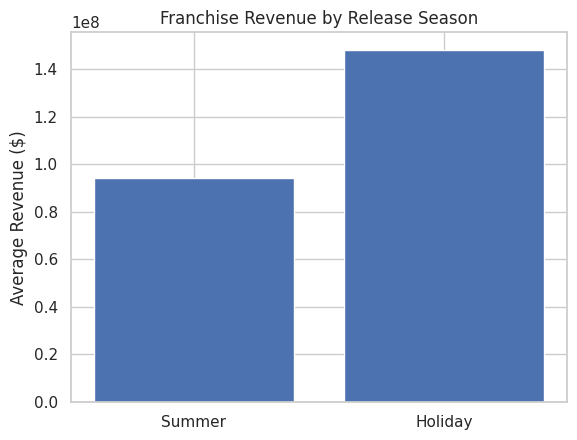

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from datetime import datetime

# Load data
movies = pd.read_csv('tmdb_5000_movies.csv')

# Convert release_date to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies = movies.dropna(subset=['release_date'])

# Extract release month name
movies['month'] = movies['release_date'].dt.month_name()

# Simplify title to detect franchises (e.g., "Frozen" from "Frozen 2")
def extract_base_title(title):
    return ''.join([word for word in title.split() if not word.isdigit() and not word.endswith(':')])

movies['base_title'] = movies['title'].apply(extract_base_title)

# Sort to keep potential pairs within franchises
movies_sorted = movies.sort_values(by=['base_title', 'release_date'])

# Keep franchises with at least 2 movies
franchise_counts = movies_sorted['base_title'].value_counts()
franchises = franchise_counts[franchise_counts >= 2].index
franchise_df = movies_sorted[movies_sorted['base_title'].isin(franchises)]

# Now create summer and holiday revenue lists based on release month
summer_months = ['June', 'July']
holiday_months = ['November', 'December']

paired_revenues = []

# Group by franchise
for name, group in franchise_df.groupby('base_title'):
    summer_revs = group[group['month'].isin(summer_months)]['revenue'].tolist()
    holiday_revs = group[group['month'].isin(holiday_months)]['revenue'].tolist()

    # Only take if both summer and holiday release exist
    if summer_revs and holiday_revs:
        # You can also handle multiple entries by averaging or taking first
        paired_revenues.append((sum(summer_revs) / len(summer_revs), sum(holiday_revs) / len(holiday_revs)))

# Unzip for test
if paired_revenues:
    summer, holiday = zip(*paired_revenues)
    stat, p = wilcoxon(holiday, summer)
    print(f"Holiday vs Summer Revenue (Wilcoxon p-value): {p:.4f}")

    # Bar plot
    plt.bar(['Summer', 'Holiday'], [sum(summer)/len(summer), sum(holiday)/len(holiday)])
    plt.ylabel('Average Revenue ($)')
    plt.title('Franchise Revenue by Release Season')
    plt.show()
else:
    print("No suitable franchise pairs found with both summer and holiday releases.")


Logistic Regression GLMs

In [82]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import Logit  # Updated link function

# Load data
df = pd.read_csv('tmdb_5000_movies.csv')

# 1. Create binary target
df['hit'] = (df['revenue'] > 1e8).astype(int)  # 1 if revenue > $100M

# 2. Select and clean predictors
predictors = ['budget', 'popularity', 'runtime']
X = df[predictors].copy()

# Handle zeros/negative budgets before log transform
X['log_budget'] = np.log(X['budget'].clip(lower=1))  # clip(lower=1) avoids log(0)
X = X.drop('budget', axis=1)

# 3. Remove infinite/NaN values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.dropna()
y = df.loc[X.index, 'hit']  # Align target with cleaned predictors

# 4. Add intercept
X = sm.add_constant(X)

# 5. Fit logistic GLM (using updated Logit link)
logit_model = sm.GLM(y, X,
                    family=Binomial(link=Logit()))  # Note: Use Logit() not logit()
results = logit_model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    hit   No. Observations:                 4801
Model:                            GLM   Df Residuals:                     4797
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1408.7
Date:                Fri, 25 Apr 2025   Deviance:                       2817.4
Time:                        11:02:24   Pearson chi2:                 4.17e+07
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3950
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.8511      0.908    -18.561      0.0

In [83]:
# Convert coefficients to odds ratios
odds_ratios = np.exp(results.params)
print("\nOdds Ratios:")
print(odds_ratios)


Odds Ratios:
const         4.804721e-08
popularity    1.068033e+00
runtime       1.000797e+00
log_budget    2.289420e+00
dtype: float64


In [84]:
from sklearn.metrics import classification_report

predicted = results.predict(X) > 0.5  # Threshold at 0.5
print(classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3675
           1       0.81      0.62      0.71      1126

    accuracy                           0.88      4801
   macro avg       0.85      0.79      0.82      4801
weighted avg       0.87      0.88      0.87      4801



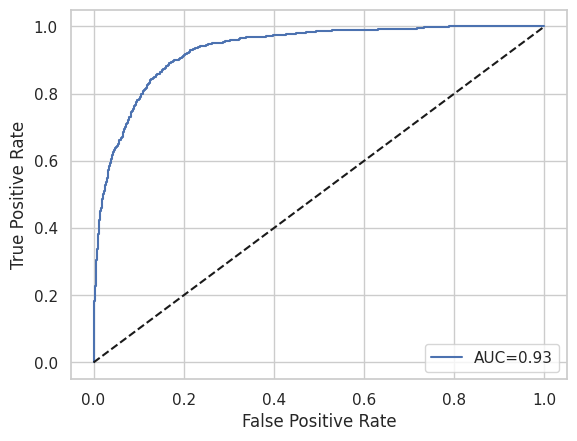

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y, results.predict(X))
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y, results.predict(X)):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


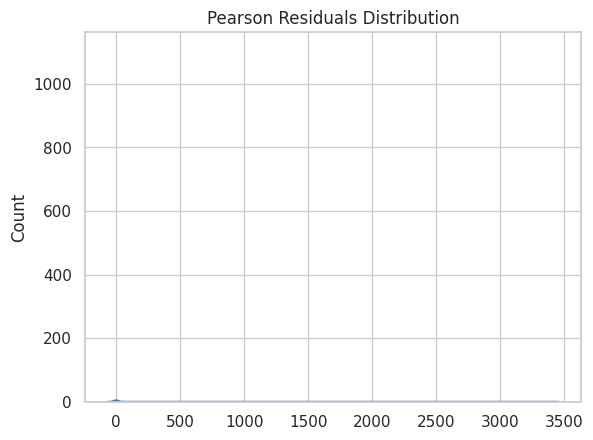

In [86]:
# Pearson residuals
residuals = results.resid_pearson
sns.histplot(residuals, kde=True)
plt.title('Pearson Residuals Distribution')
plt.show()